# Libraries

In [105]:
import pandas as pd
import numpy as np
import dash
from dash import Dash
import seaborn as sns
from dash import html
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Reading Data

In [106]:
df = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/01_Visualization of Complex Data/05_Projects/Patient-Survival-Prediction---Dash-Visualization/dataset/Dataset.csv')

# Dataframe Info

In [135]:
# df.info()
df['apache_4a_icu_death_prob'].max()

0.97

# Dataframe Description

In [108]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
df['apache_2_diagnosis'].min()

101.0

# Checking for Null Values

In [110]:
Null_Values = df.isna().sum()/len(df)
Null_Values.sort_values(ascending=False, inplace=True)
round(Null_Values,2)

h1_bilirubin_min         0.92
h1_bilirubin_max         0.92
h1_lactate_max           0.92
h1_lactate_min           0.92
h1_albumin_max           0.91
                         ... 
icu_type                 0.00
pre_icu_los_days         0.00
readmission_status       0.00
apache_post_operative    0.00
encounter_id             0.00
Length: 186, dtype: float64

# Dropping Features with High Missing Values

In [111]:
df_dropped = df.copy()
for cols in df_dropped.columns:
    if df_dropped[cols].isna().sum()/len(df_dropped) > 0.20:
        df_dropped = df_dropped.drop(cols, axis=1)
df_dropped['immunosuppression'].dtype

dtype('float64')

In [112]:
dropped_Null_Values = df_dropped.isna().sum()/len(df_dropped)
dropped_Null_Values.sort_values(ascending=False
                                )

d1_hco3_max              0.164328
d1_hco3_min              0.164328
d1_platelets_max         0.146588
d1_platelets_min         0.146588
d1_wbc_min               0.143644
                           ...   
icu_type                 0.000000
pre_icu_los_days         0.000000
readmission_status       0.000000
apache_post_operative    0.000000
encounter_id             0.000000
Length: 104, dtype: float64

# Figuring out Numerical and Categorical Feature

In [113]:
Categorical = []
for col in df_dropped.columns:
    if df_dropped[col].dtype == 'object':
        Categorical.append(col)
    
for col in df_dropped.columns:
    if (df_dropped[col].dtype == 'int64' or df_dropped[col].dtype == 'float64') and df_dropped[col].nunique(dropna=False) <= 6:
        Categorical.append(col)
        
print("Categorical columns:", Categorical)

Categorical columns: ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


# Imputing Categorical Columns with Mode Imputation

In [114]:
imputer = SimpleImputer(strategy='most_frequent')
for column in Categorical:
    df_dropped[column] = imputer.fit_transform(df_dropped[column].values.reshape(-1, 1)).flatten()

In [115]:
df_dropped

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


# Dividing Categorical and Numerical Features
#### The reason to divide the categorical and Numerical Features is to pass the numerical feature to Multiple Imputation by Chained Equation

In [116]:
Categorical_copy = pd.DataFrame()
for cols in Categorical:
    Categorical_copy[cols] = df_dropped[cols]
    df_dropped = df_dropped.drop([cols],axis=1)

In [117]:
Categorical_copy

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,elective_surgery,readmission_status,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Multiple Imputation by Chained Equation

In [118]:
df_copy = df_dropped.copy()

missing_mask = df_copy.isna()

imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_values = imputer.fit_transform(df_copy)

imputed_df = pd.DataFrame(imputed_values, columns=df_copy.columns, index=df_copy.index)

df_copy[missing_mask] = imputed_df[missing_mask]

In [119]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   height                         91713 non-null  float64
 6   icu_id                         91713 non-null  int64  
 7   pre_icu_los_days               91713 non-null  float64
 8   weight                         91713 non-null  float64
 9   apache_2_diagnosis             91713 non-null  float64
 10  apache_3j_diagnosis            91713 non-null  float64
 11  gcs_motor_apache               91713 non-null  float64
 12  glucose_apache                 91713 non-null 

# Concat Categorical and Numerical Columns 

In [120]:
df_copy = pd.concat([Categorical_copy, df_copy], axis=1)

In [162]:
df_copy['encounter_id']

0         66154
1        114252
2        119783
3         79267
4         92056
          ...  
91708     91592
91709     66119
91710      8981
91711     33776
91712      1671
Name: encounter_id, Length: 91713, dtype: int64

# Checking for Outliers on Imputed DataFrame

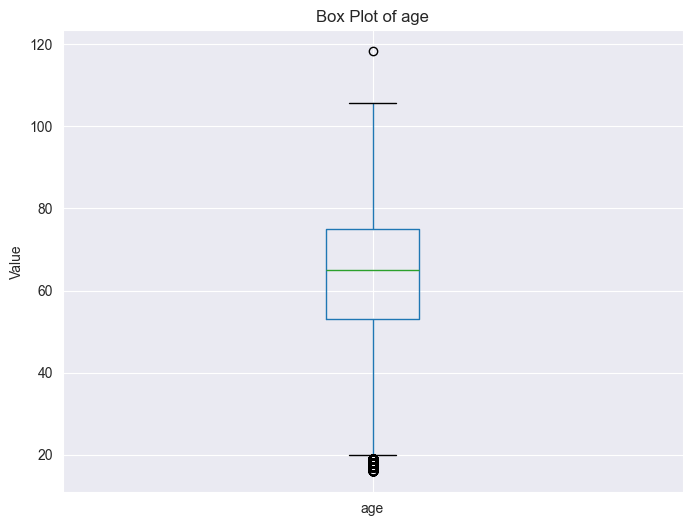

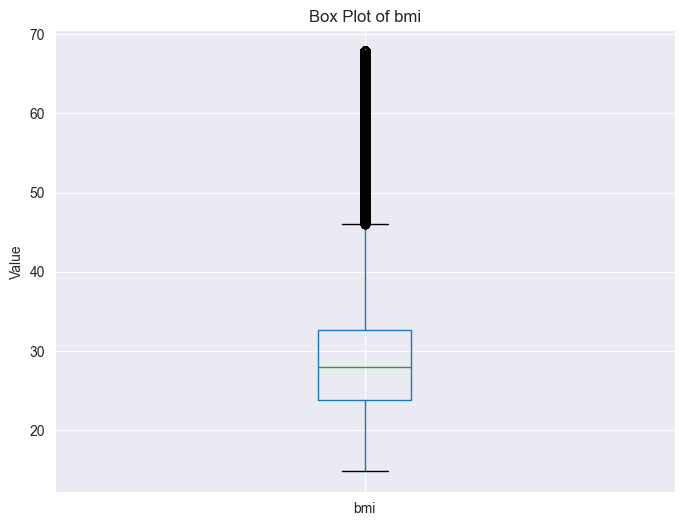

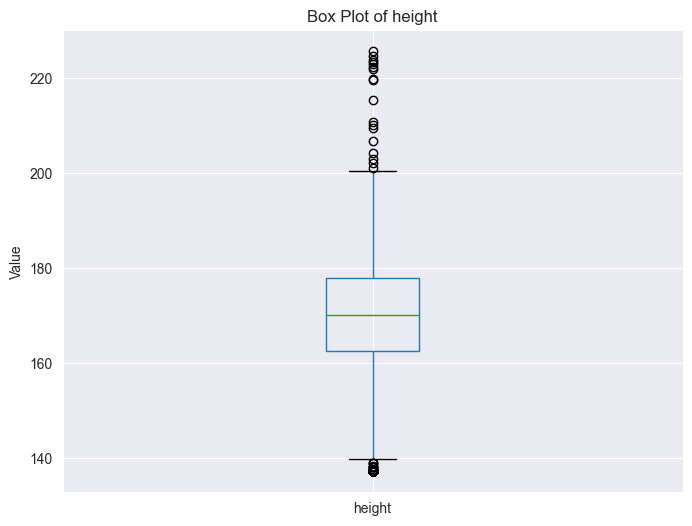

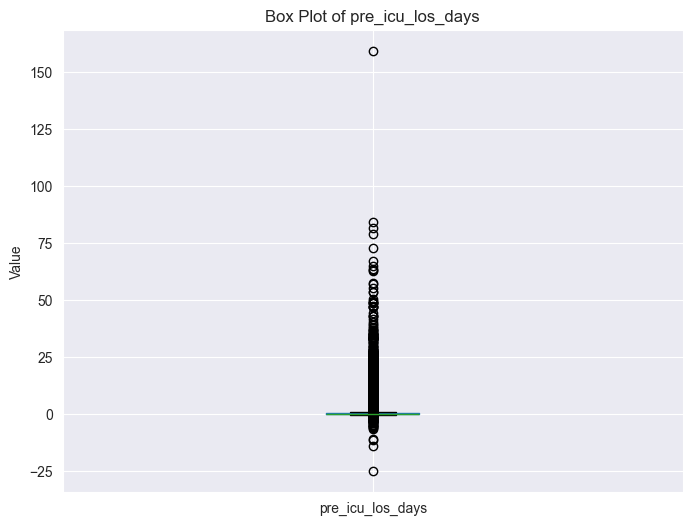

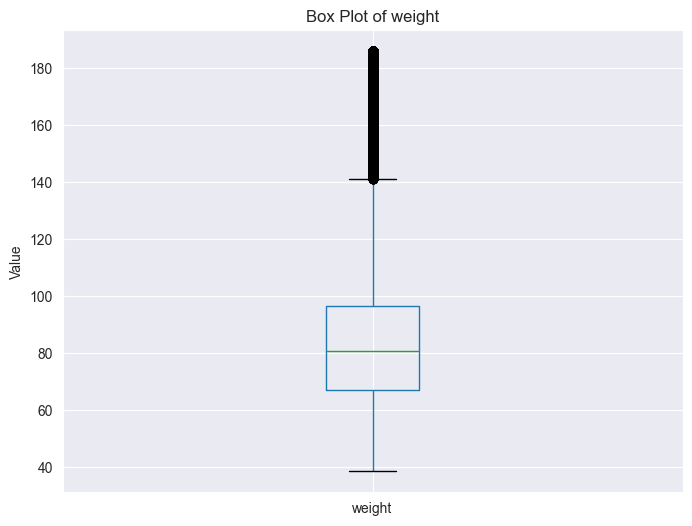

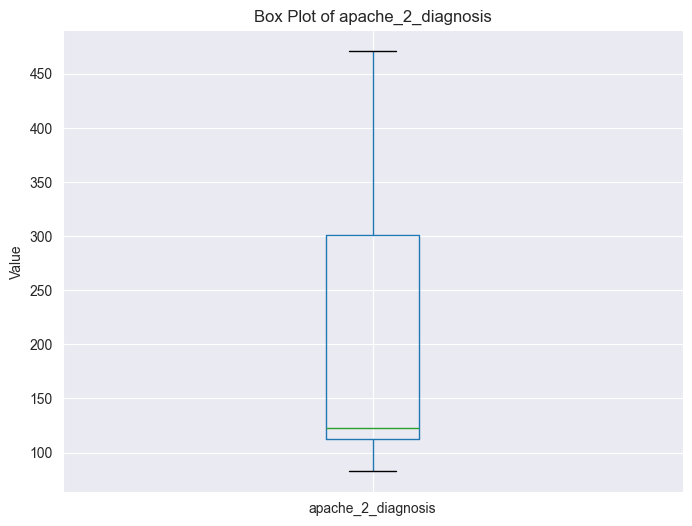

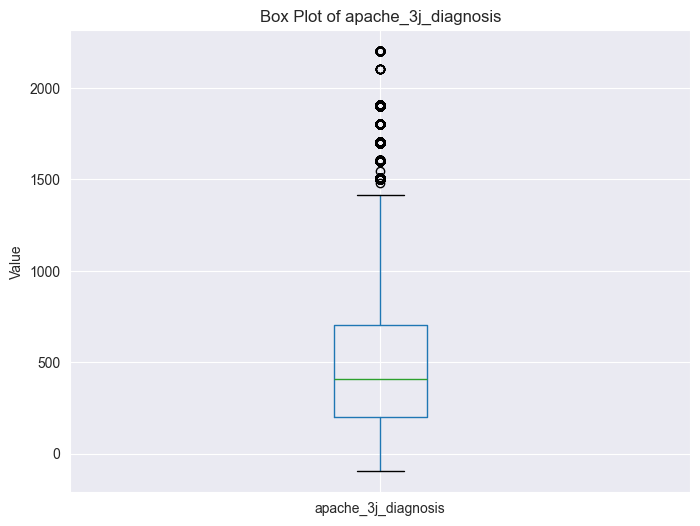

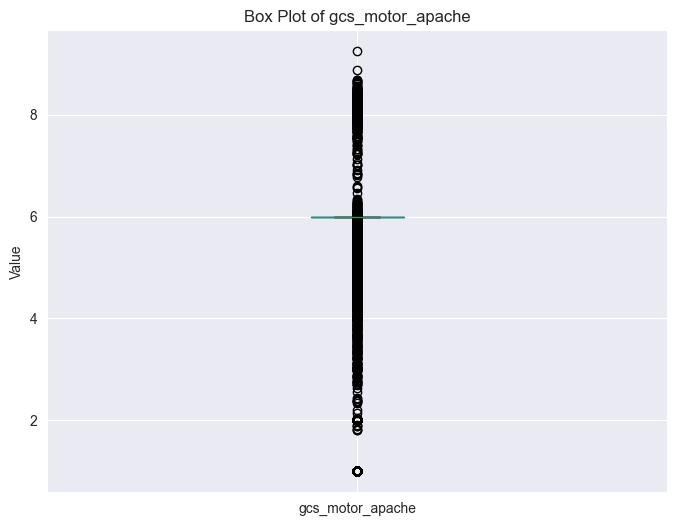

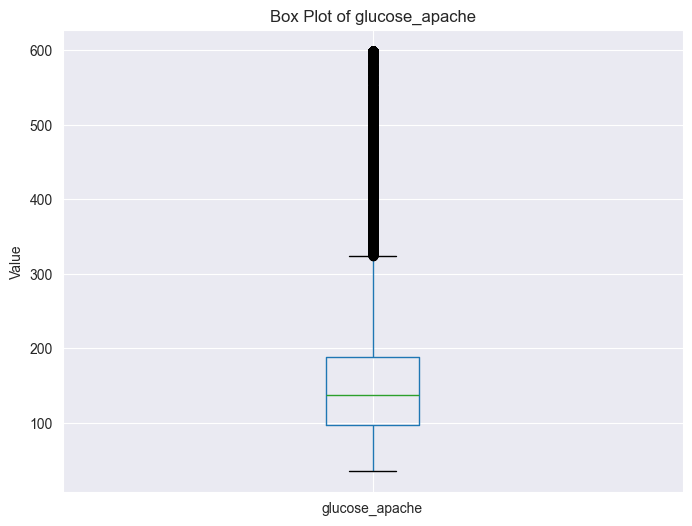

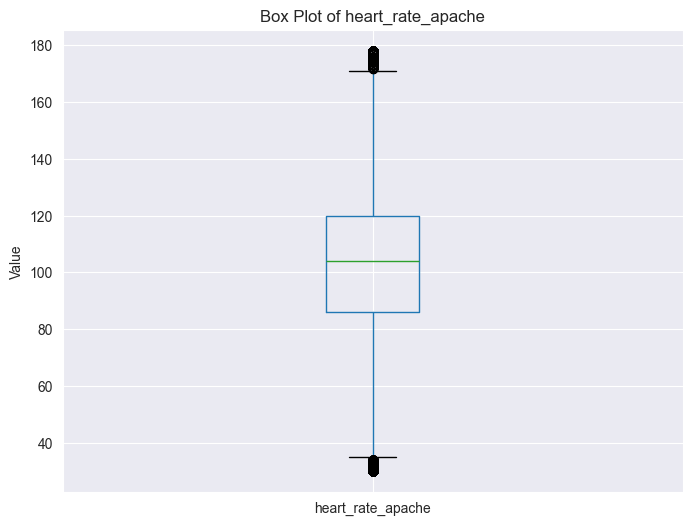

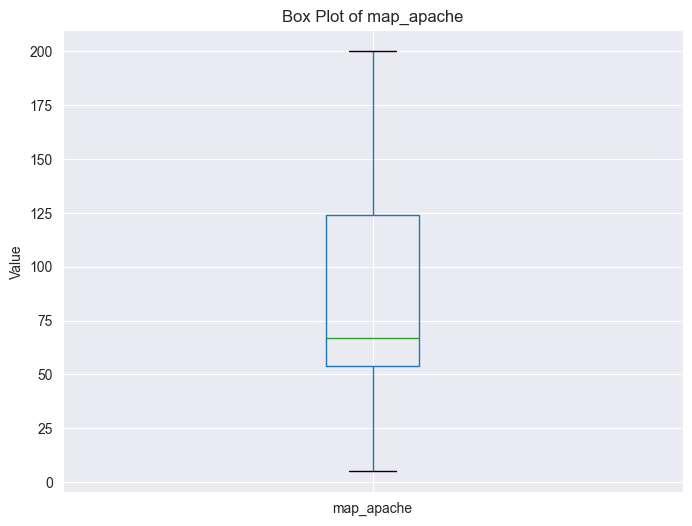

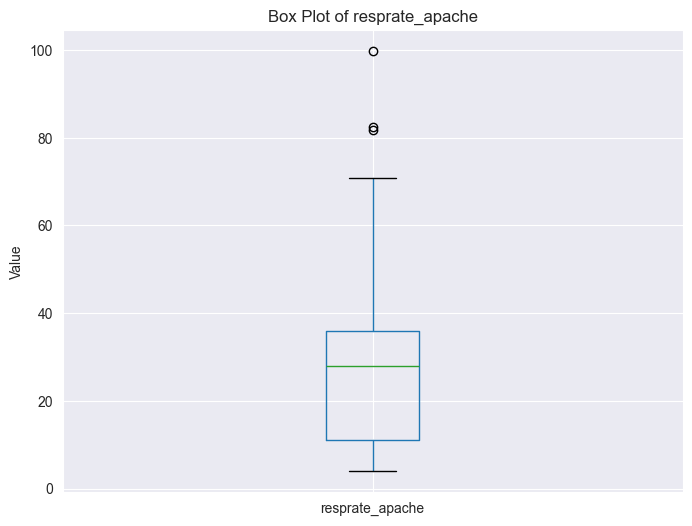

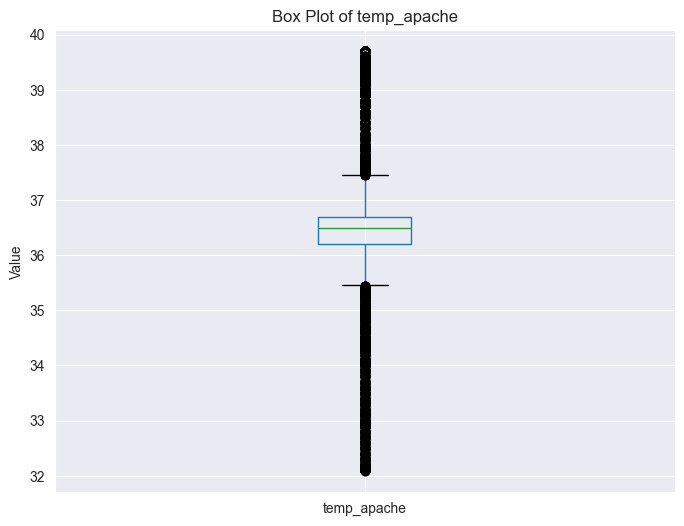

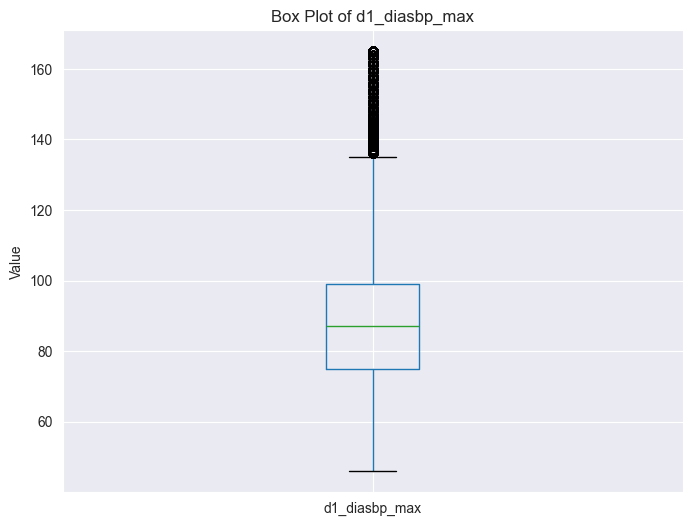

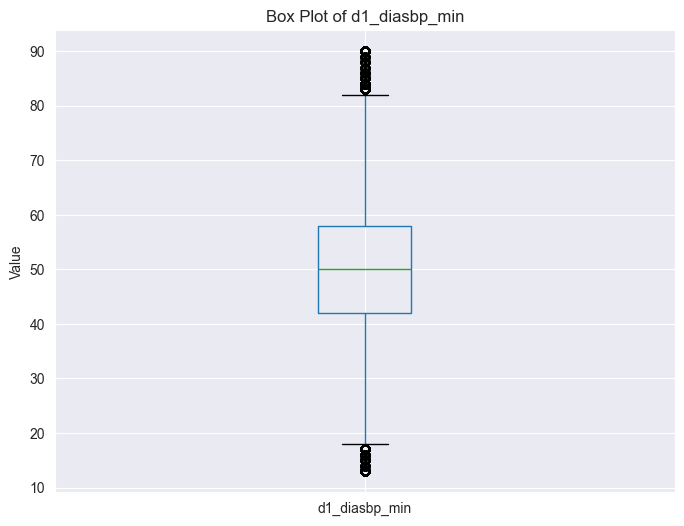

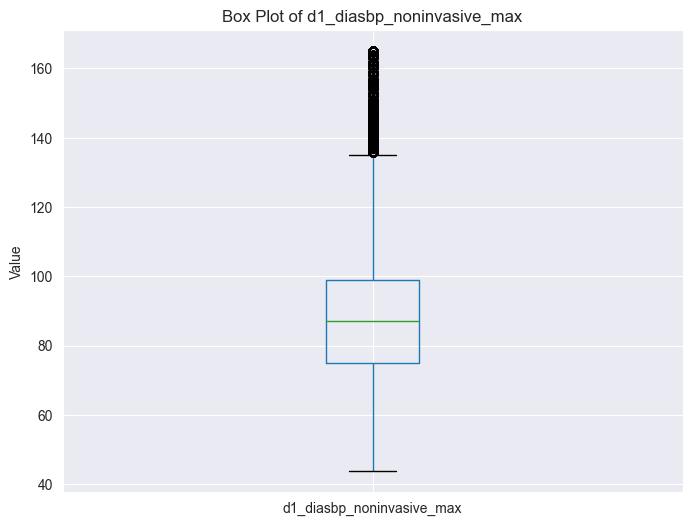

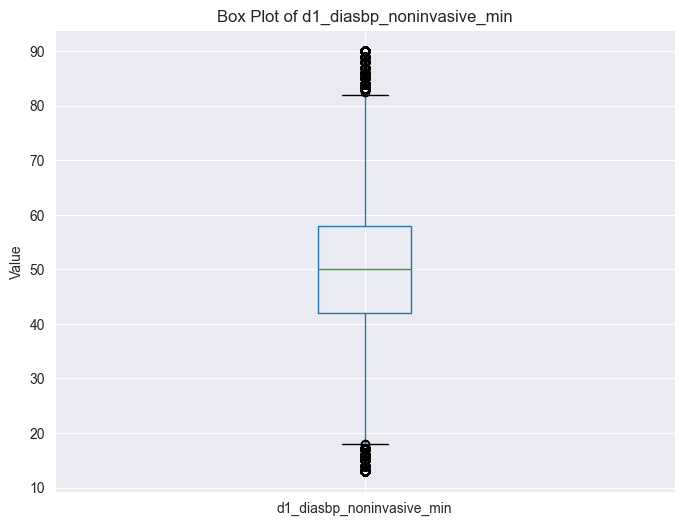

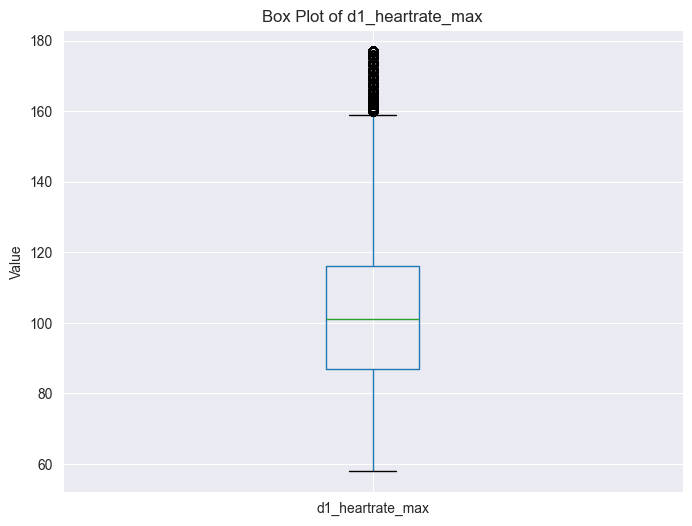

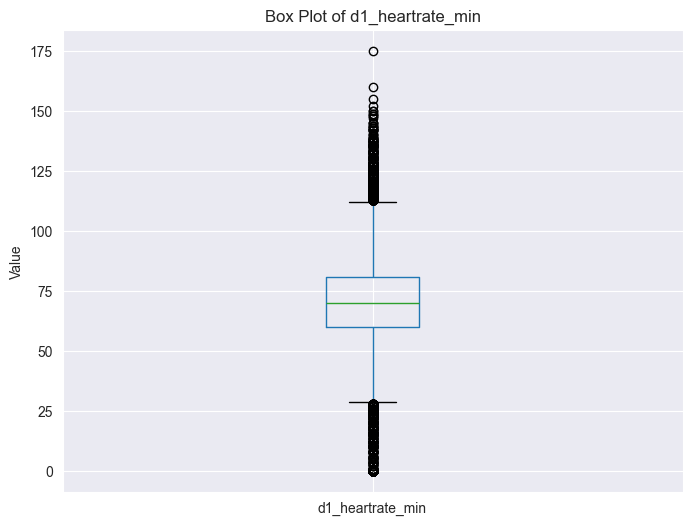

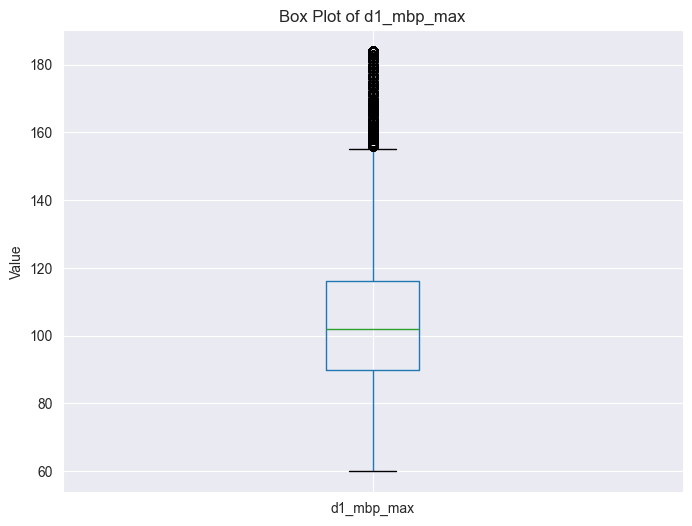

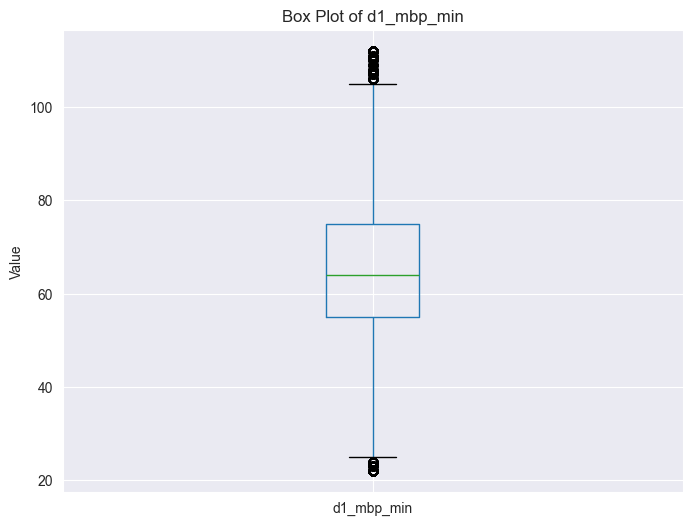

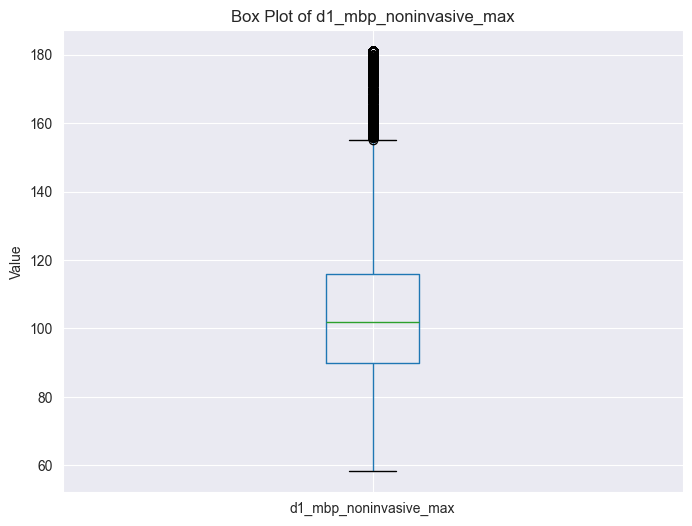

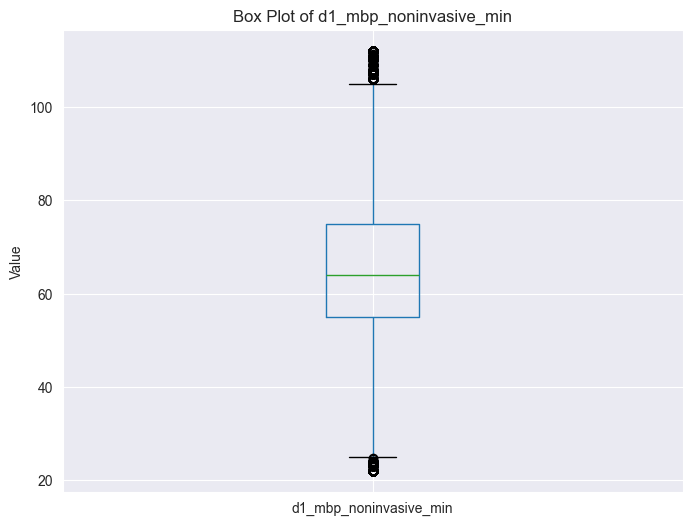

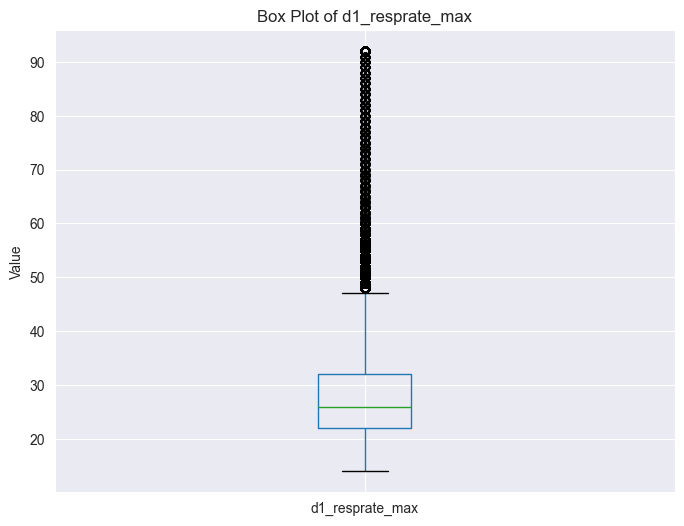

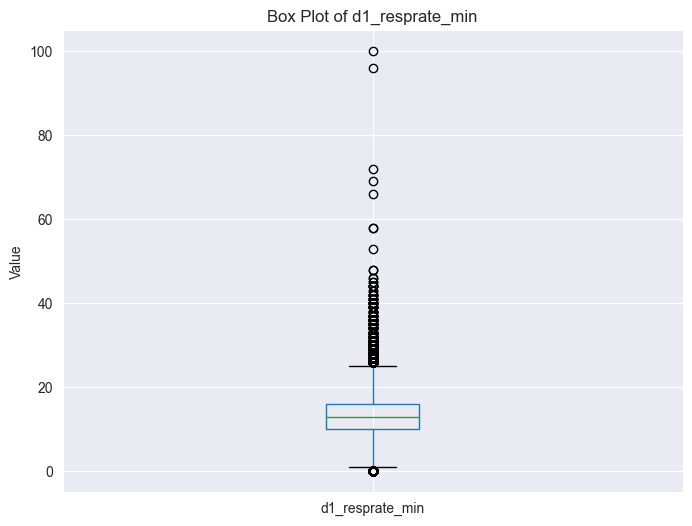

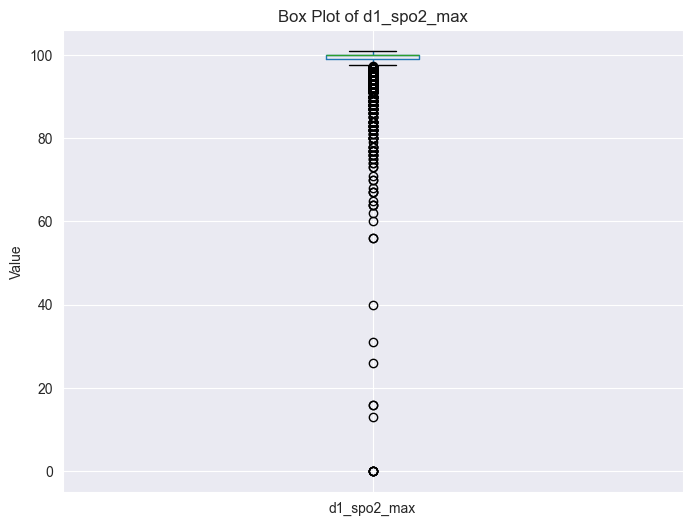

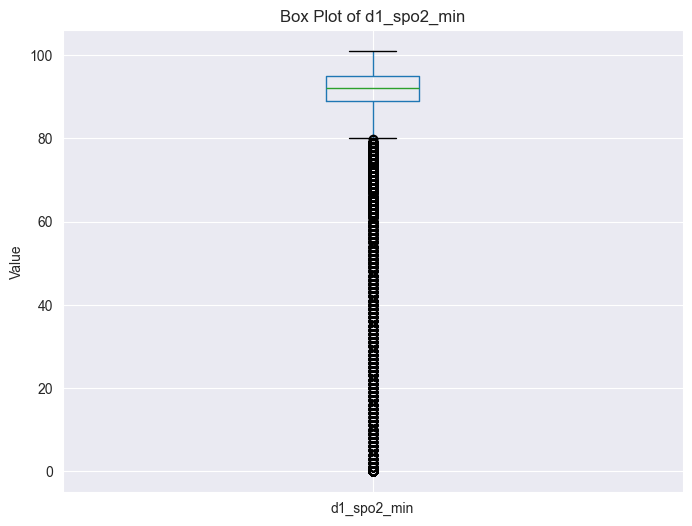

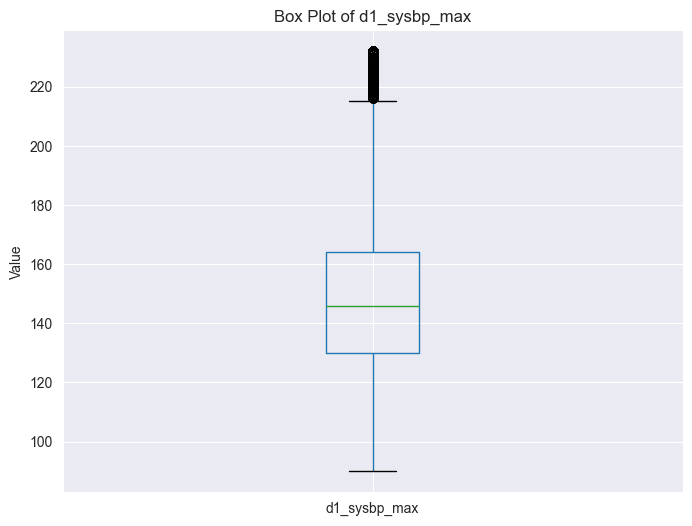

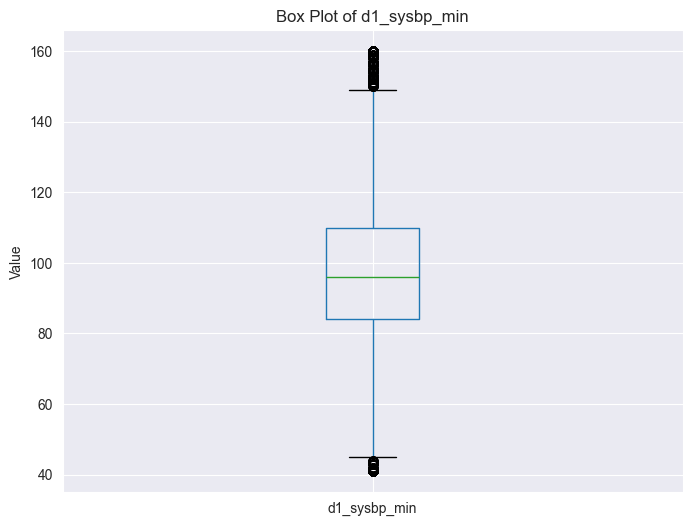

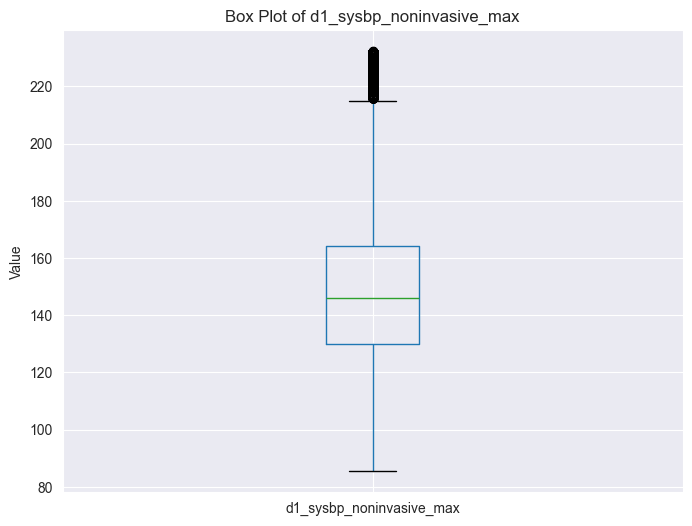

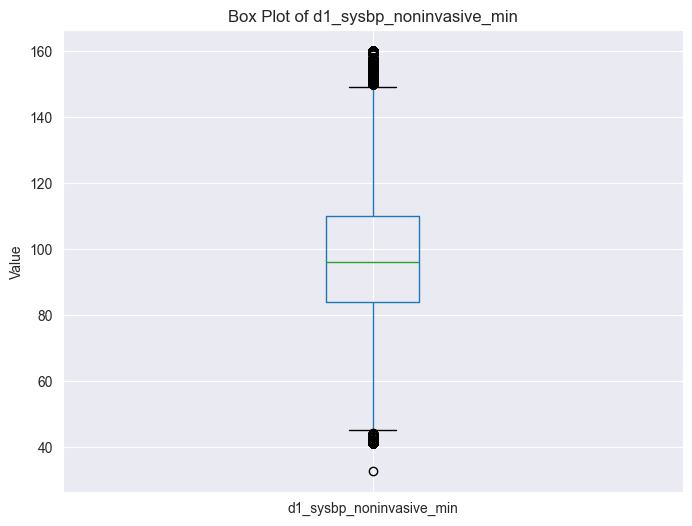

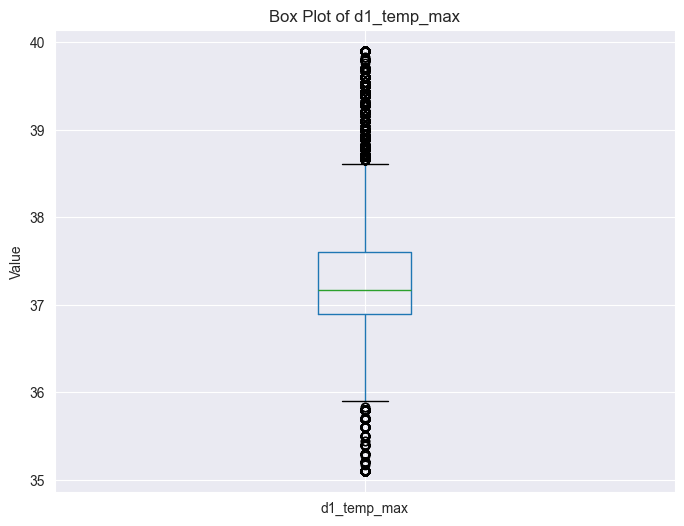

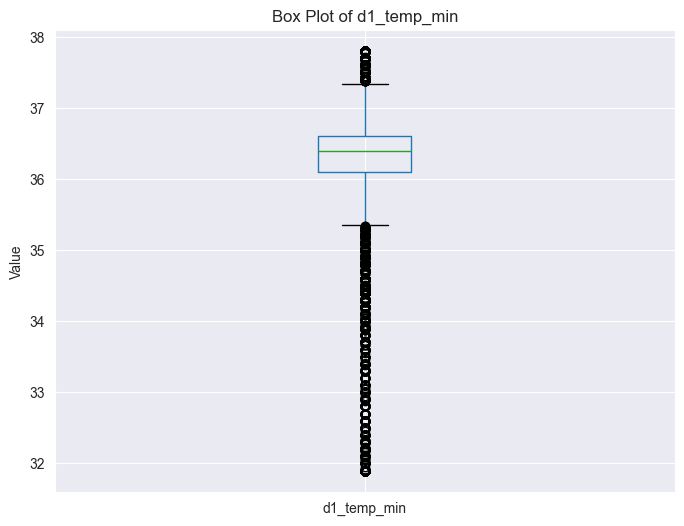

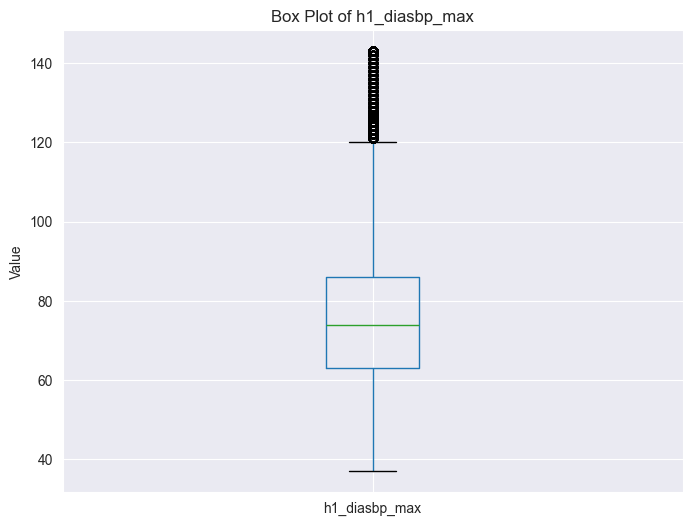

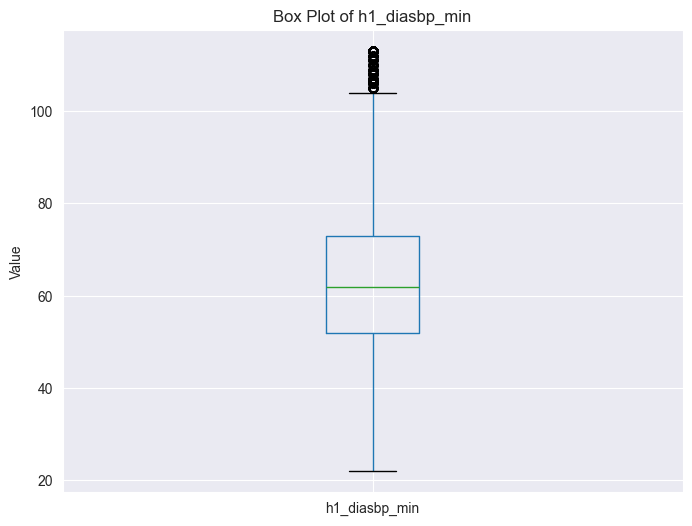

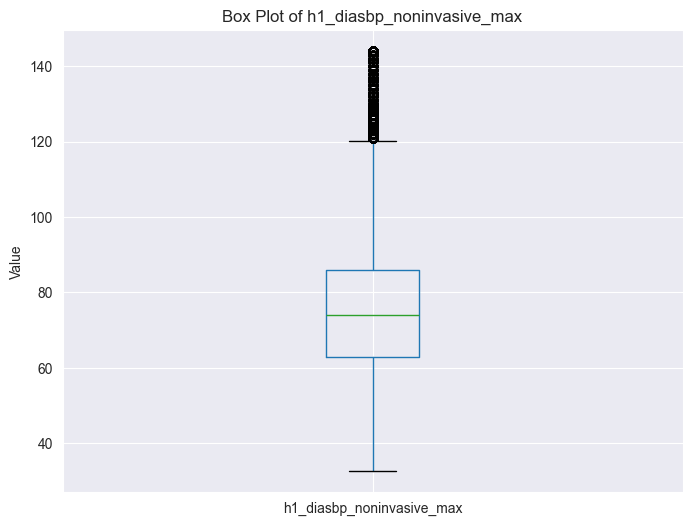

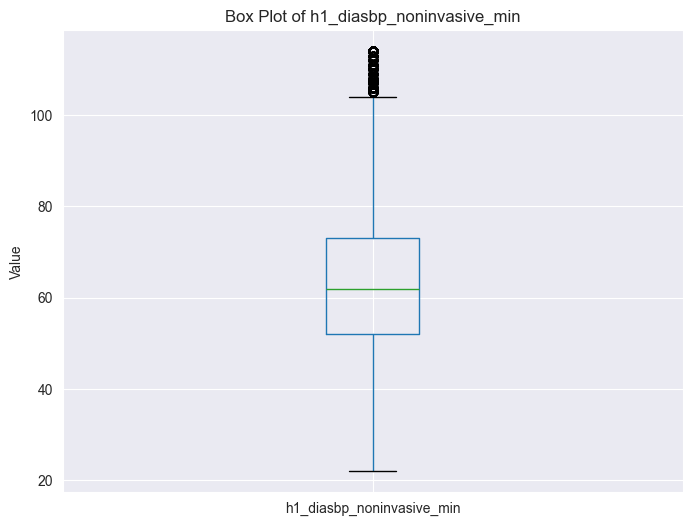

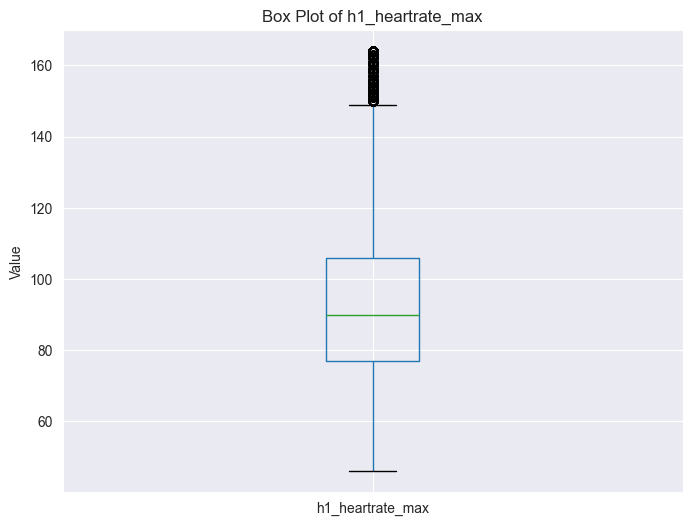

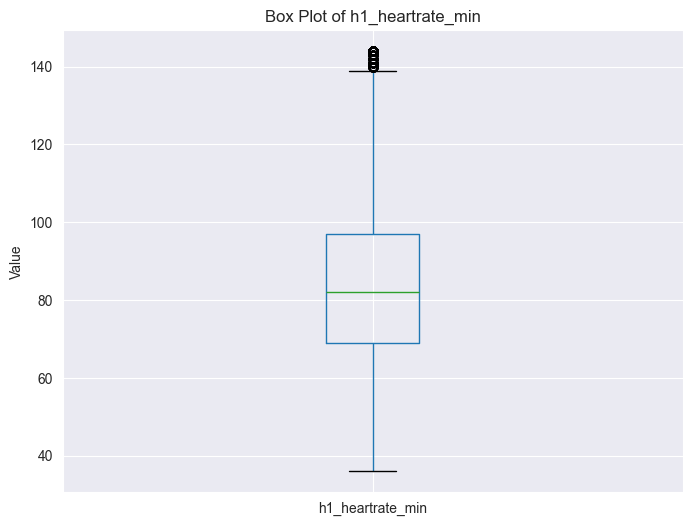

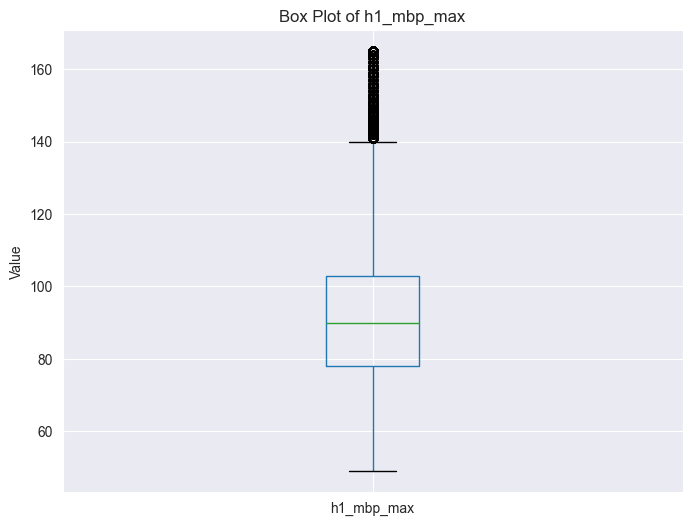

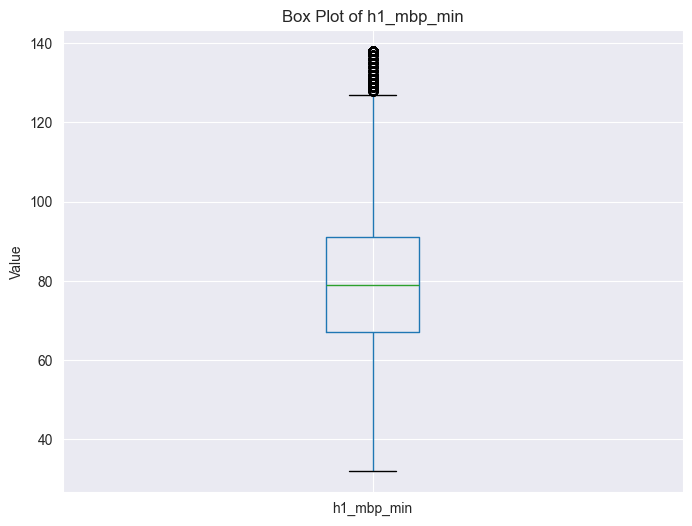

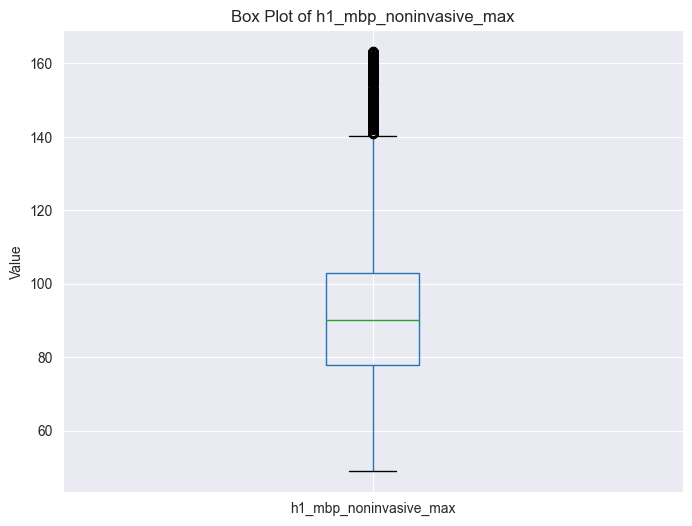

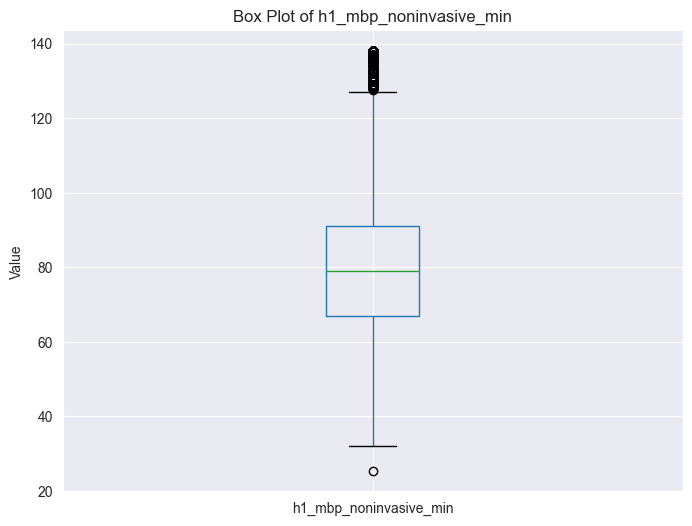

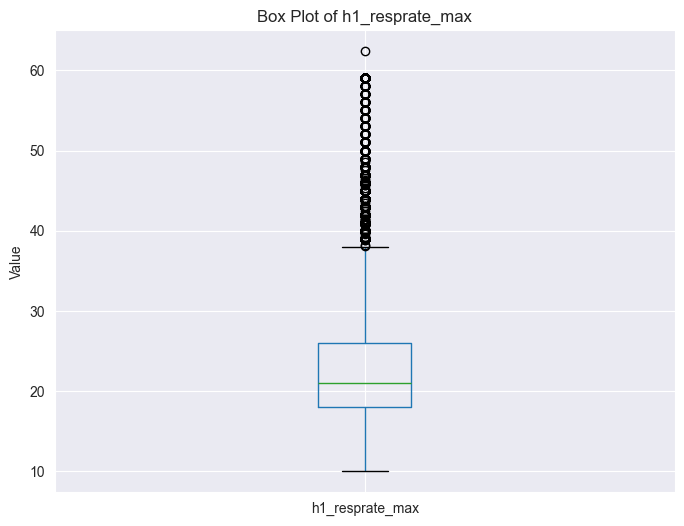

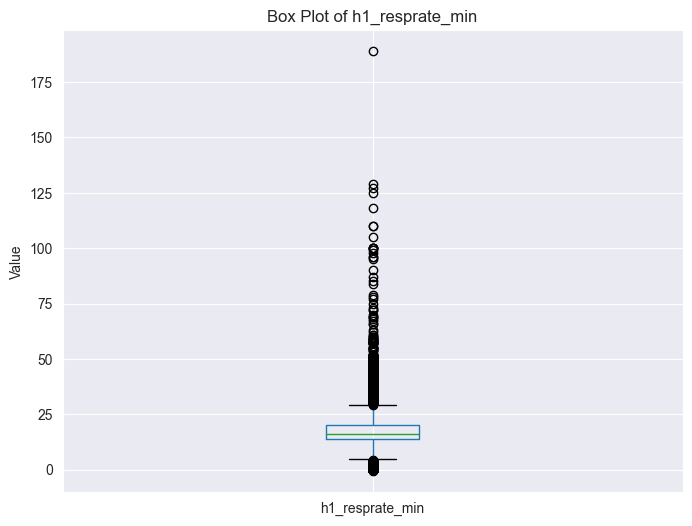

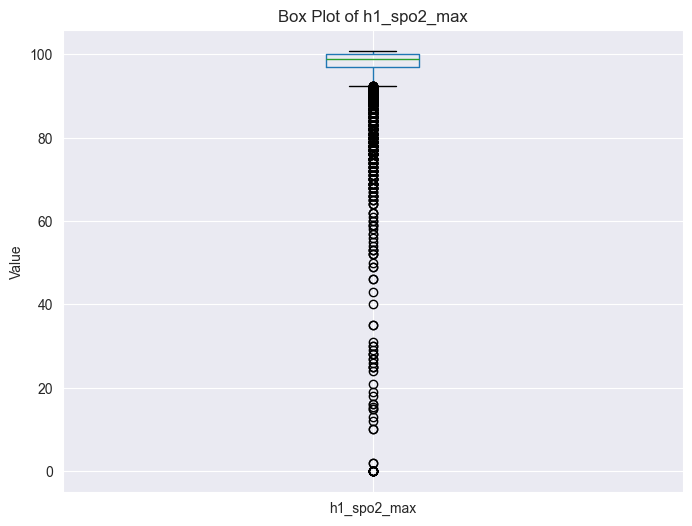

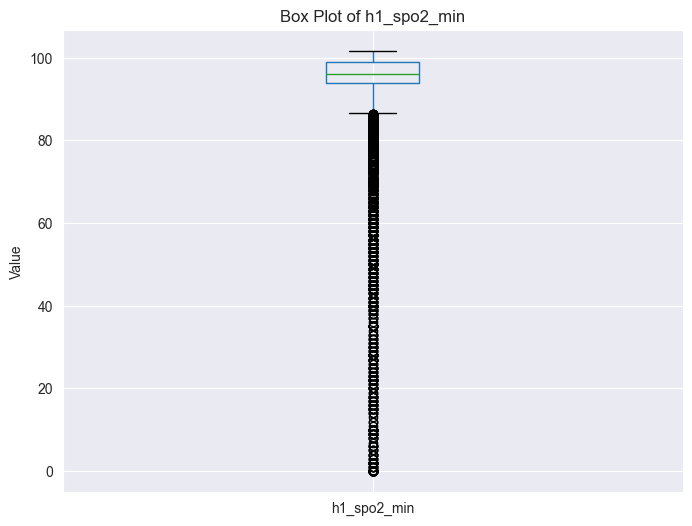

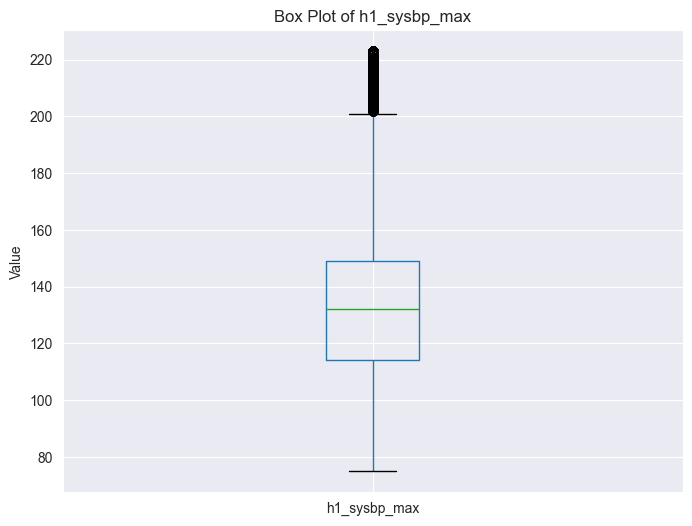

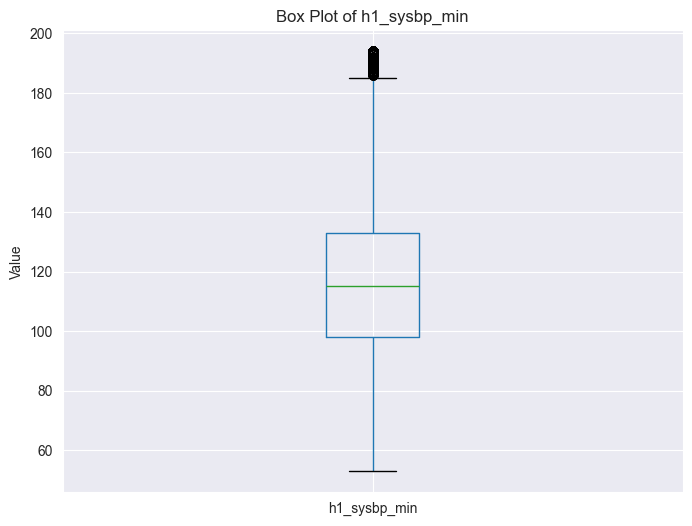

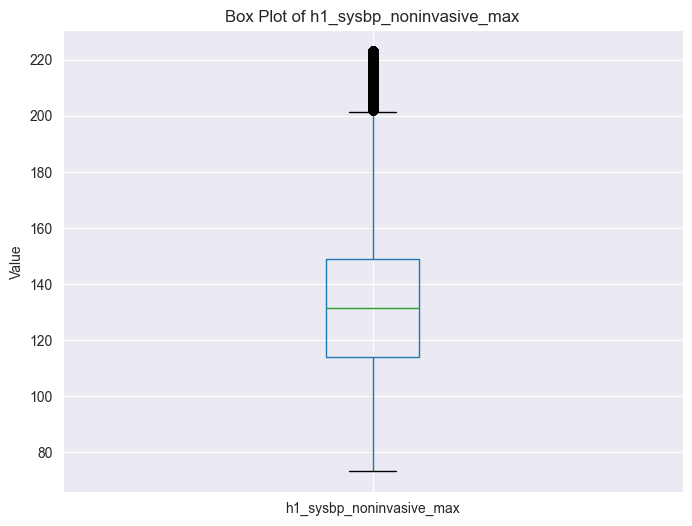

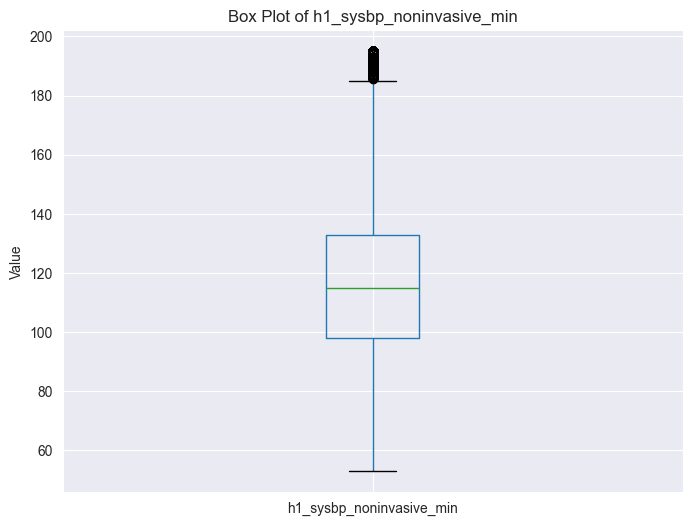

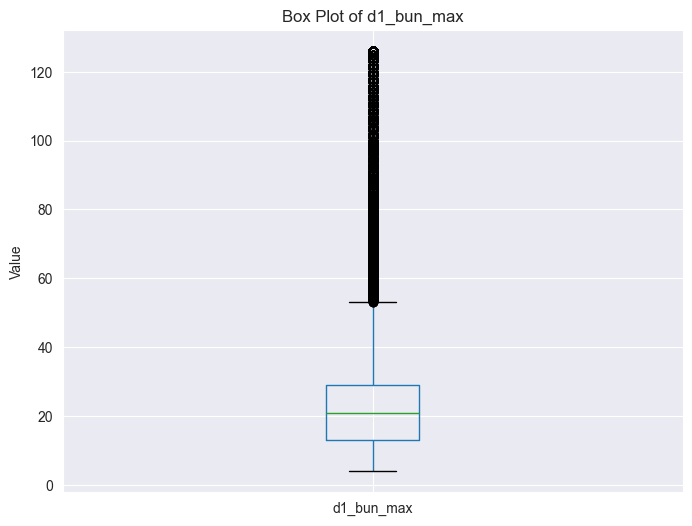

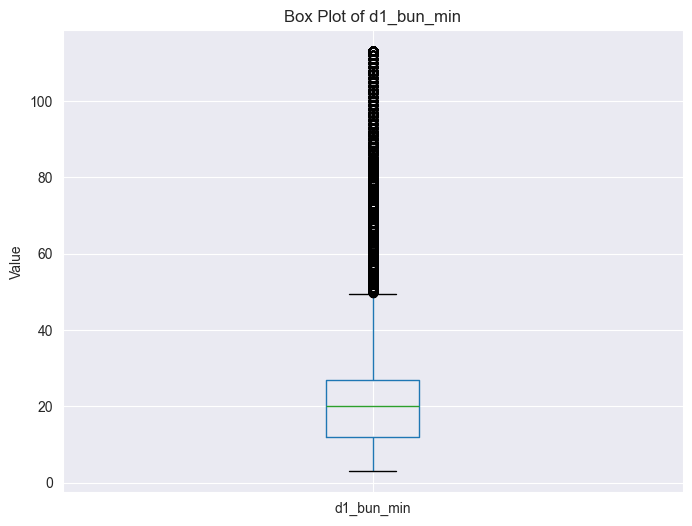

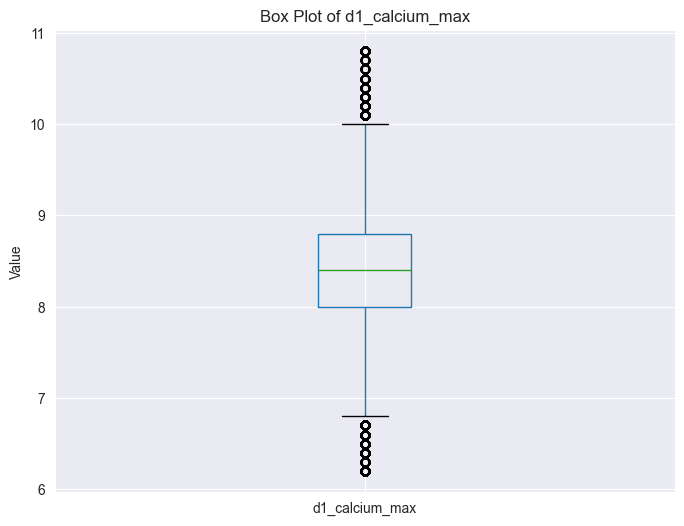

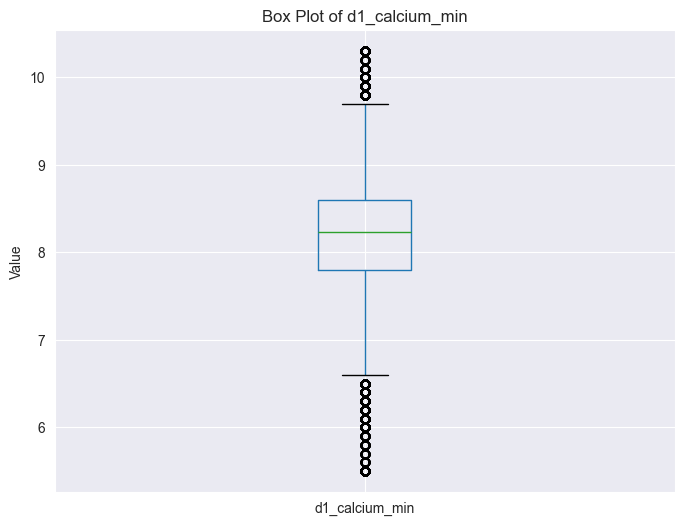

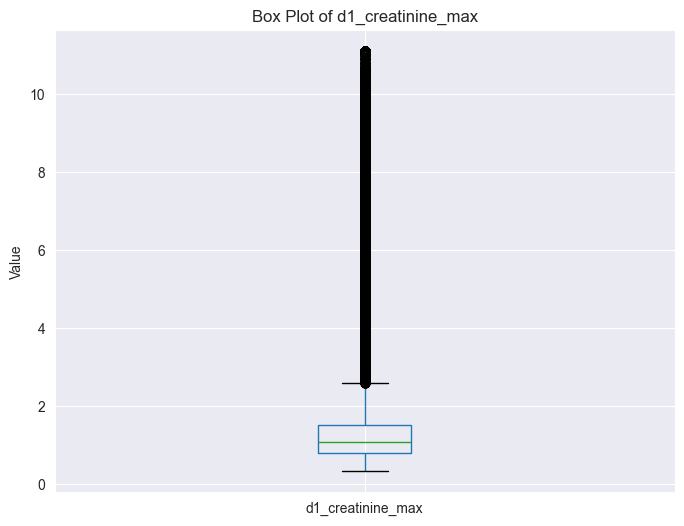

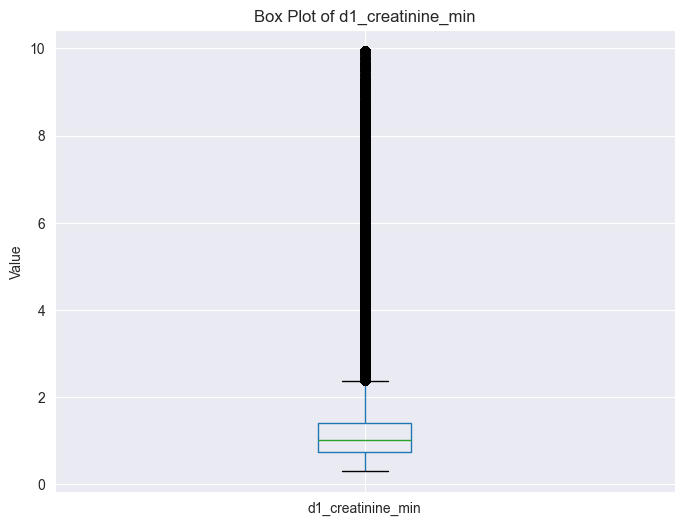

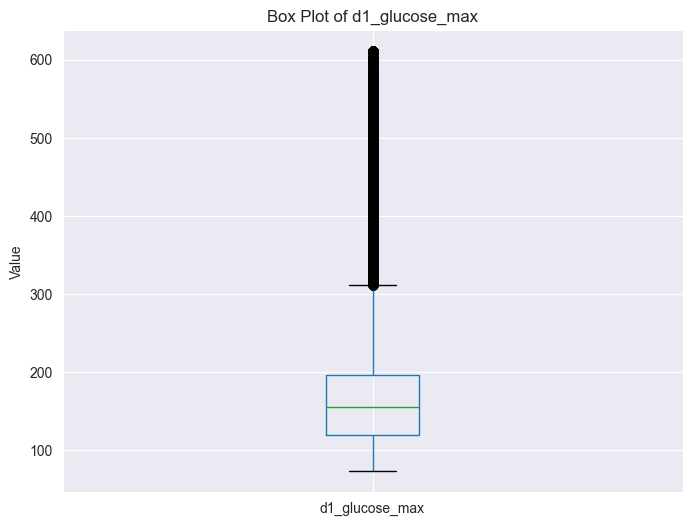

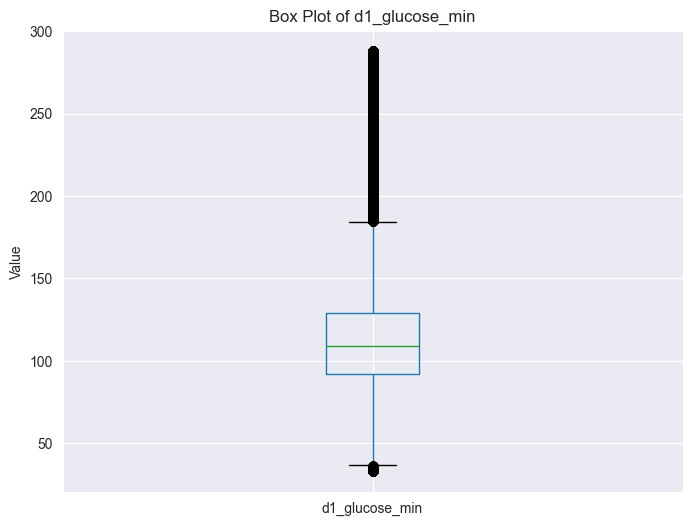

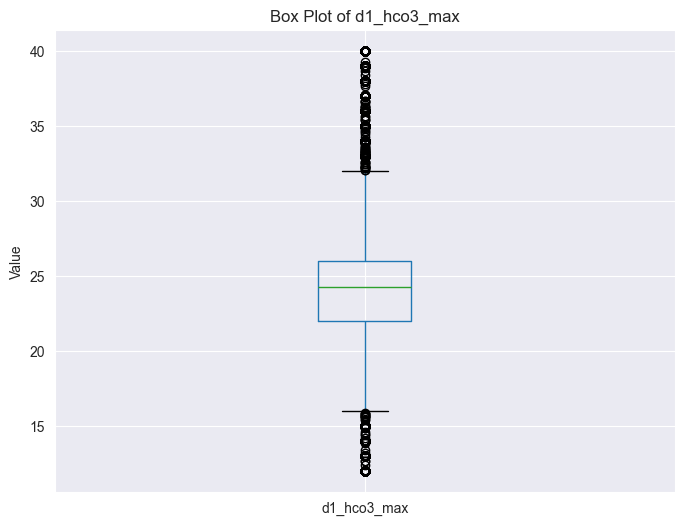

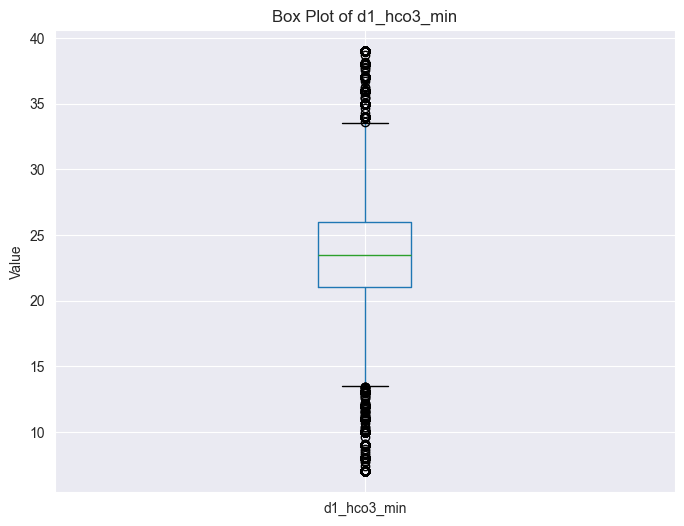

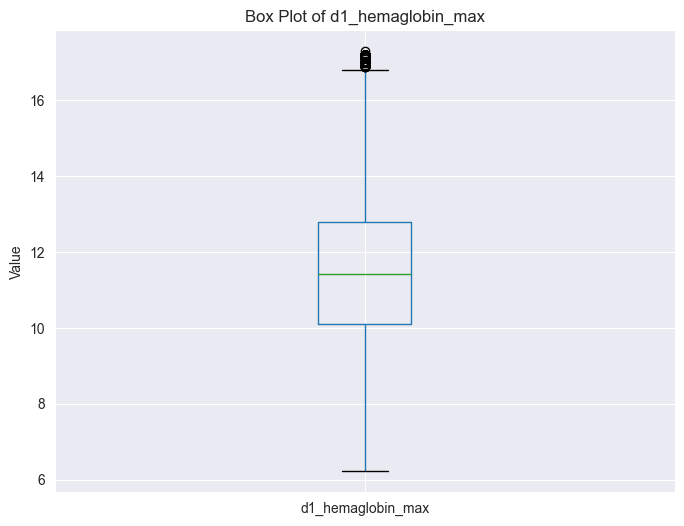

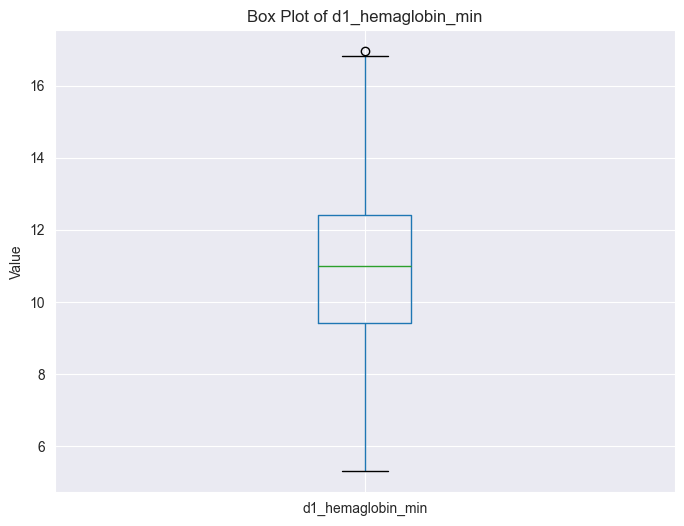

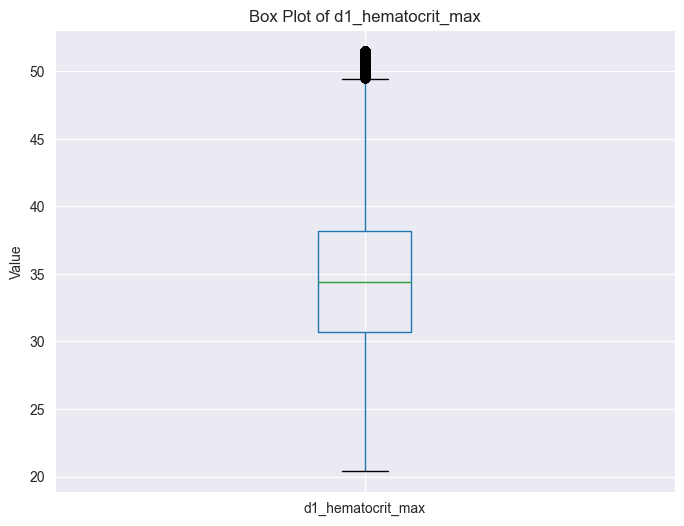

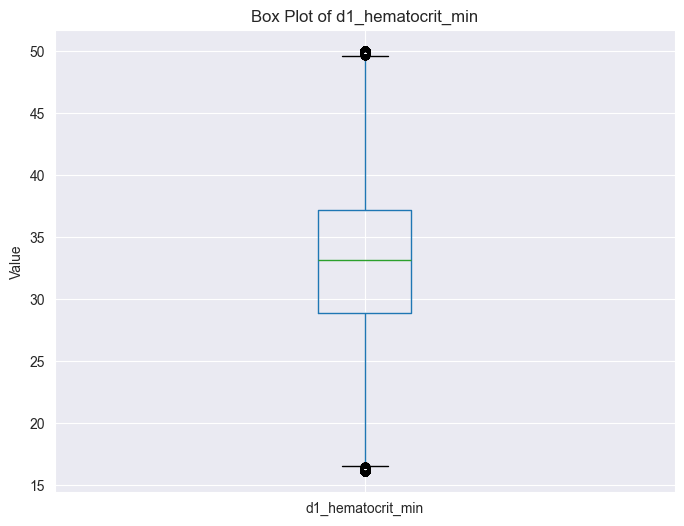

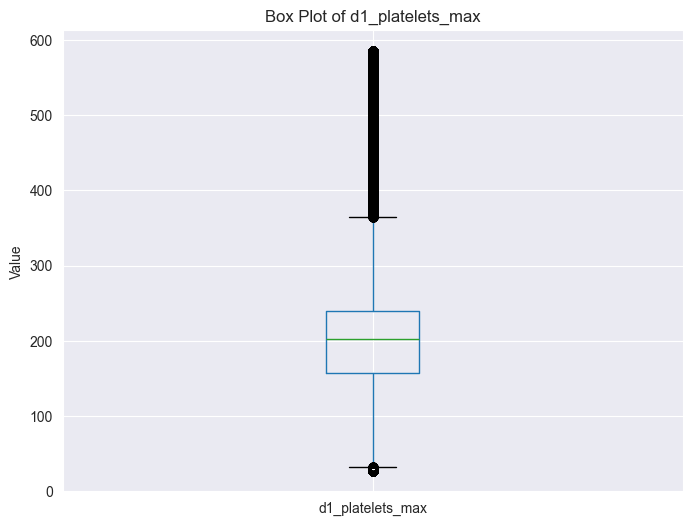

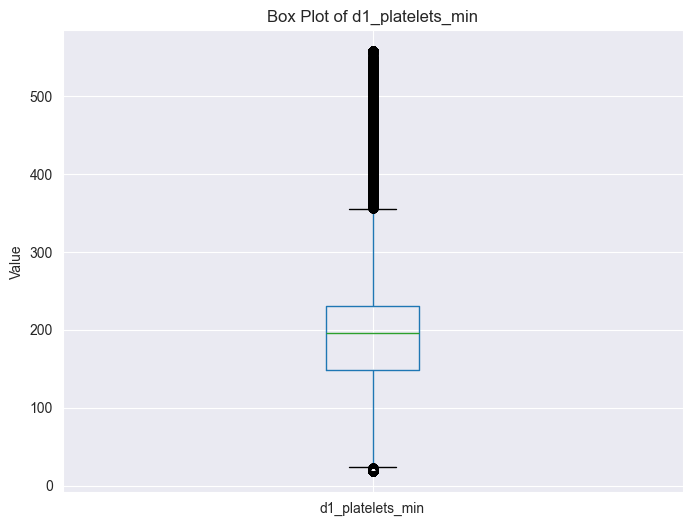

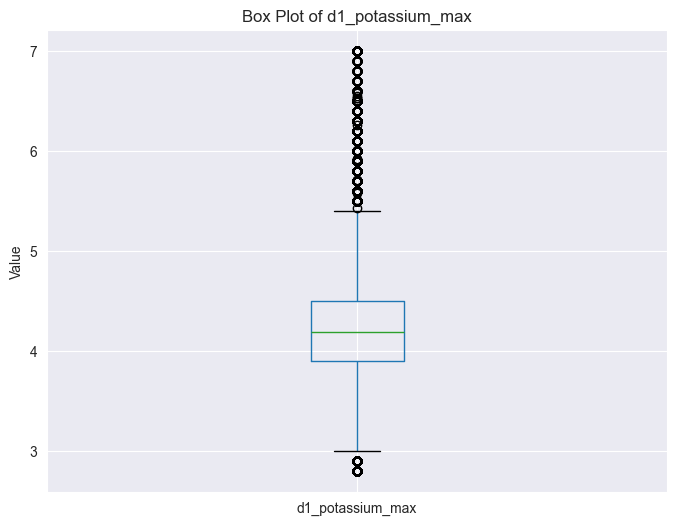

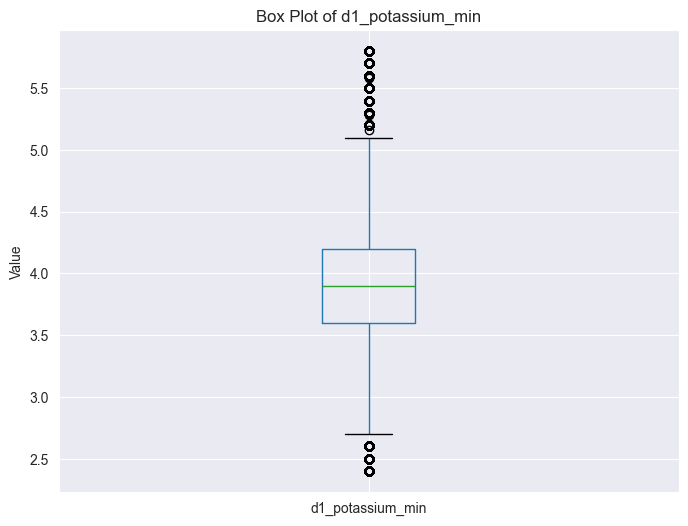

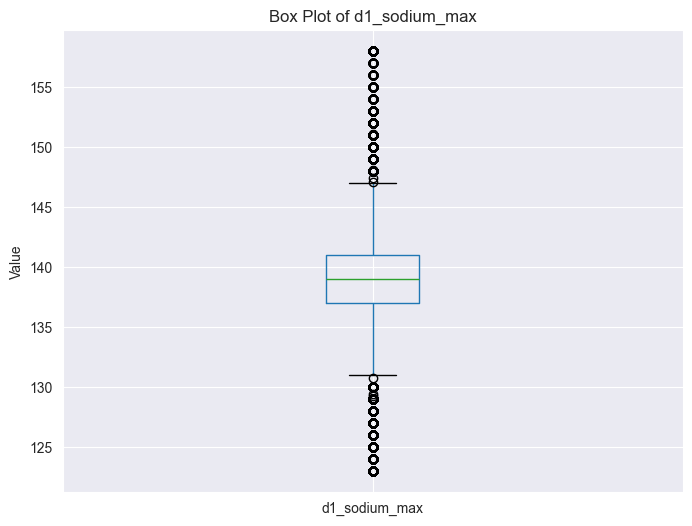

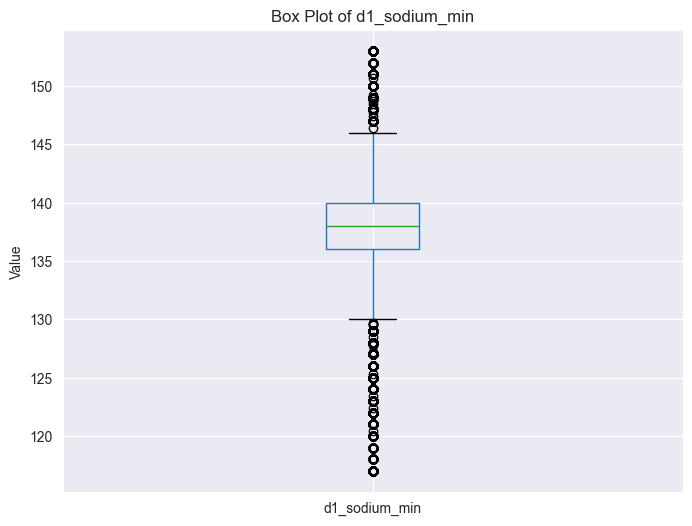

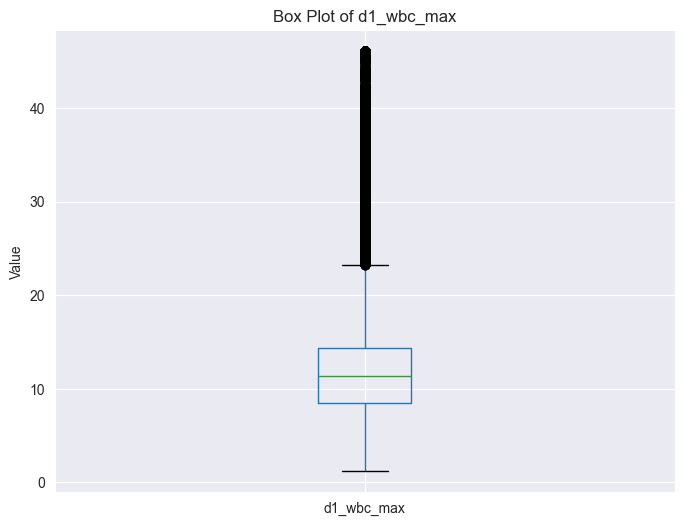

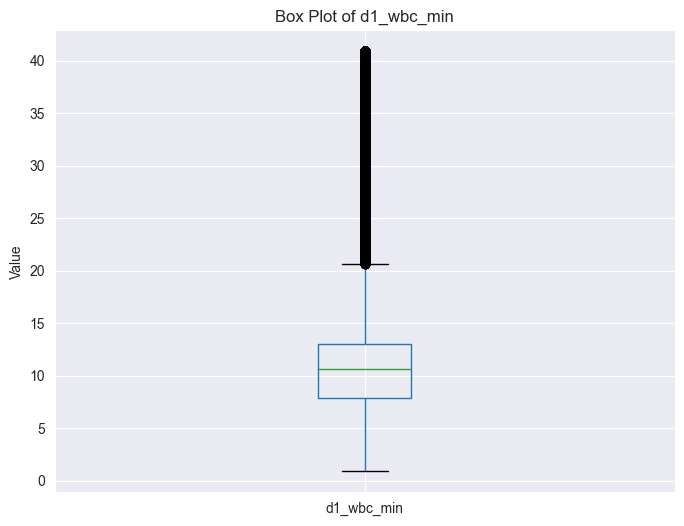

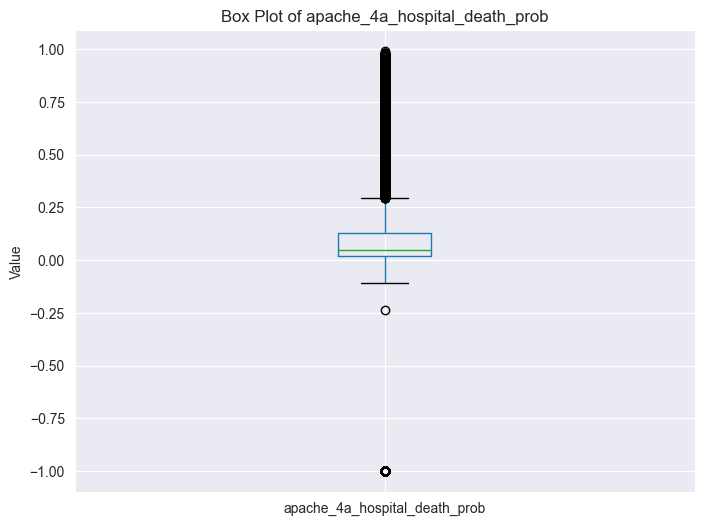

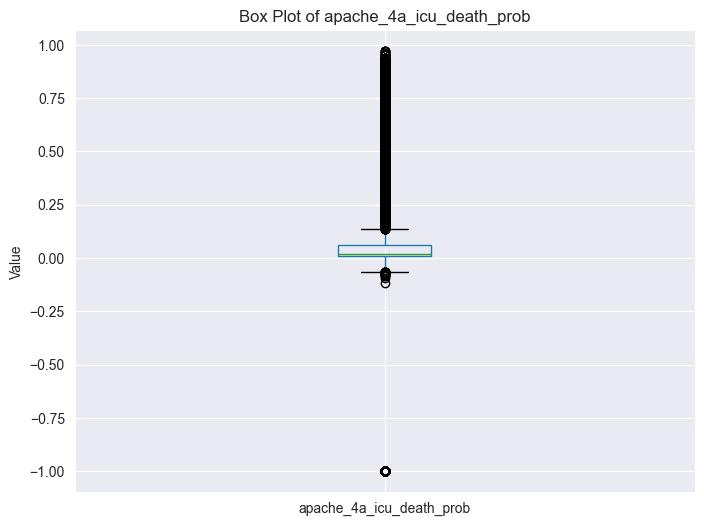

In [122]:
numeric_columns_copy = df_copy.select_dtypes(include=['int', 'float']).columns

filtered_columns_copy = [col for col in numeric_columns_copy if len(df_copy[col].unique()) > 6 and not col.endswith('_id')]

for column in filtered_columns_copy:
    plt.figure(figsize=(8, 6))
    df_copy.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()

In [123]:
count=0
for col in df_copy:
    if df_copy[col].dtype == 'int64' or df_copy[col].dtype == 'float64':
        print(f'-------------------------{count}:{col}-------------------------:\nMinimum Value: {df_copy[col].min()}\nMaximum Value: {df_copy[col].max()}')
        count=count+1

-------------------------0:hospital_death-------------------------:
Minimum Value: 0
Maximum Value: 1
-------------------------1:elective_surgery-------------------------:
Minimum Value: 0
Maximum Value: 1
-------------------------2:readmission_status-------------------------:
Minimum Value: 0
Maximum Value: 0
-------------------------3:apache_post_operative-------------------------:
Minimum Value: 0
Maximum Value: 1
-------------------------4:arf_apache-------------------------:
Minimum Value: 0.0
Maximum Value: 1.0
-------------------------5:gcs_eyes_apache-------------------------:
Minimum Value: 1.0
Maximum Value: 4.0
-------------------------6:gcs_unable_apache-------------------------:
Minimum Value: 0.0
Maximum Value: 1.0
-------------------------7:gcs_verbal_apache-------------------------:
Minimum Value: 1.0
Maximum Value: 5.0
-------------------------8:intubated_apache-------------------------:
Minimum Value: 0.0
Maximum Value: 1.0
-------------------------9:ventilated_apache

# Outlier removal

In [150]:
df_filtered_outliers = df_copy.copy()  

columns_to_process = [
    'age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 
    'apache_3j_diagnosis', 'glucose_apache', 'heart_rate_apache', 
    'map_apache', 'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min', 
    'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 
    'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 
    'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 
    'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 
    'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 
    'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 
    'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 
    'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 
    'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 
    'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_bun_max', 'd1_bun_min', 
    'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 
    'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 
    'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 
    'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 
    'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min'
]

# The reason to slice this is because, those two columns are anomolies and they don't need any outlier removal.

for column in columns_to_process:

    Q1 = df_filtered_outliers[column].quantile(0.25)
    Q3 = df_filtered_outliers[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered_outliers = df_filtered_outliers[(df_filtered_outliers[column] >= lower_bound) & (df_filtered_outliers[column] <= upper_bound)]

# Making sure that there is no negative values

In [151]:
for column in filtered_columns_copy:
    df_filtered_outliers[column] = df_filtered_outliers[column].apply(lambda x: np.nan if x < 0 else x)

df_filtered_outliers = df_filtered_outliers.dropna()

df_filtered_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12193 entries, 2 to 91711
Columns: 104 entries, ethnicity to apache_4a_icu_death_prob
dtypes: float64(89), int64(8), object(7)
memory usage: 9.8+ MB


# Outlier Removal Plot

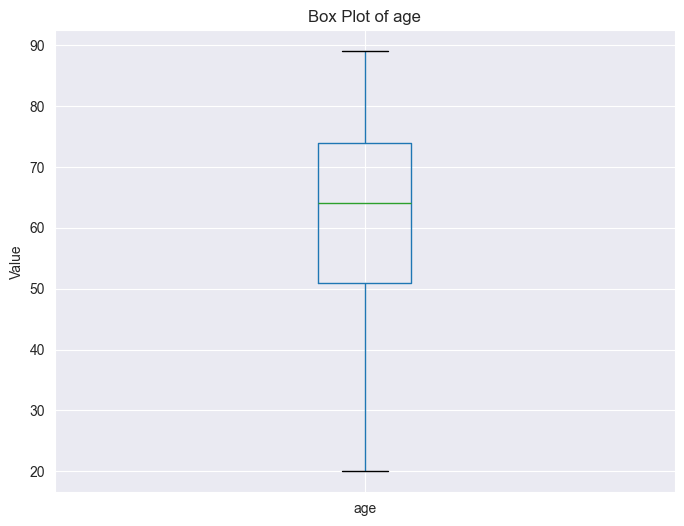

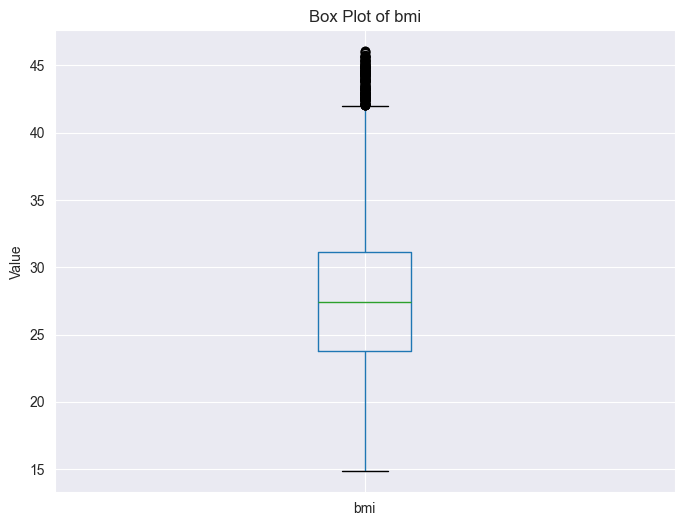

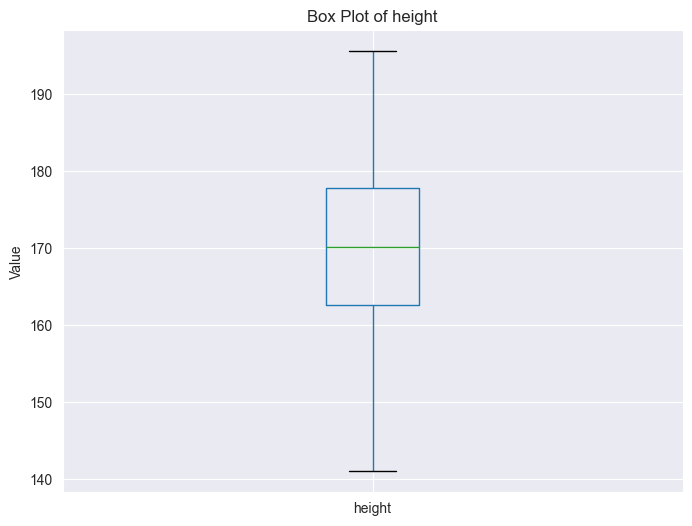

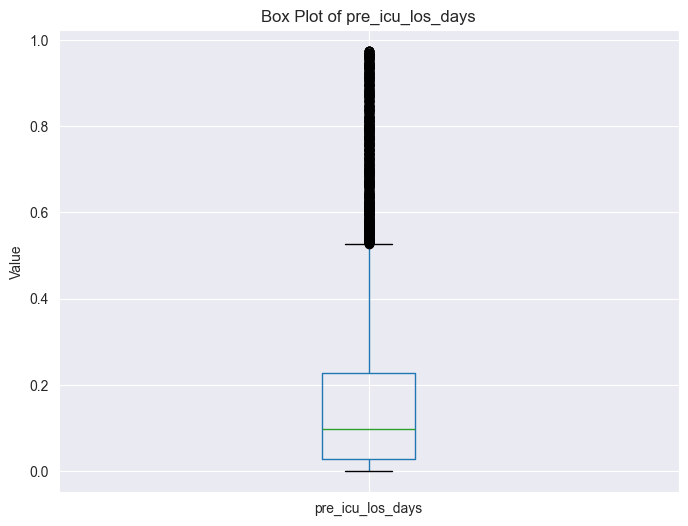

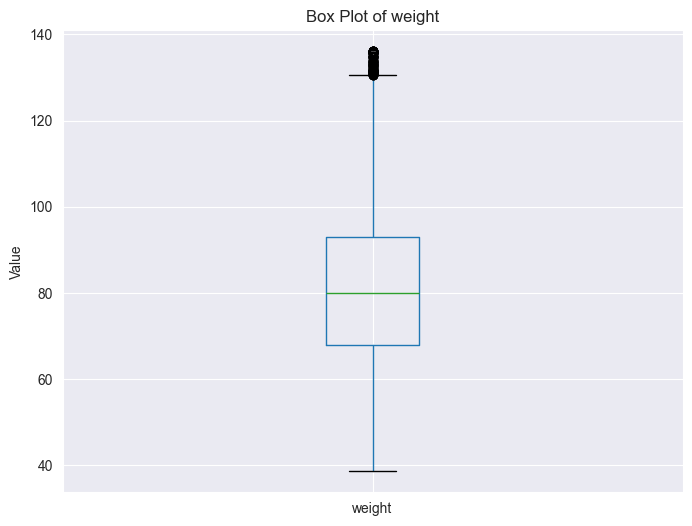

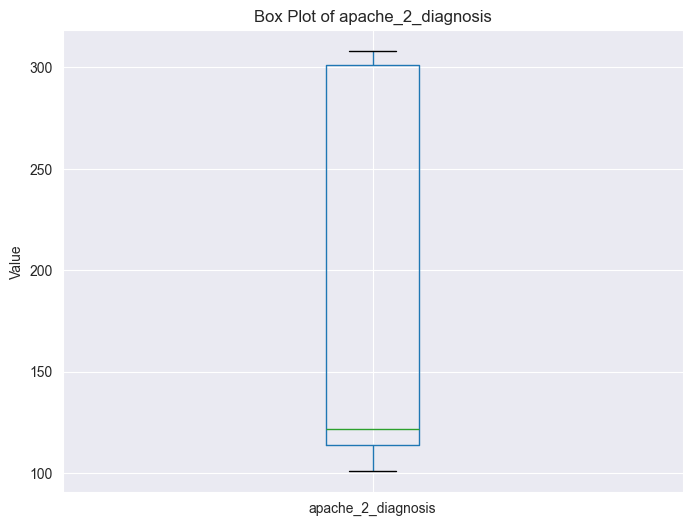

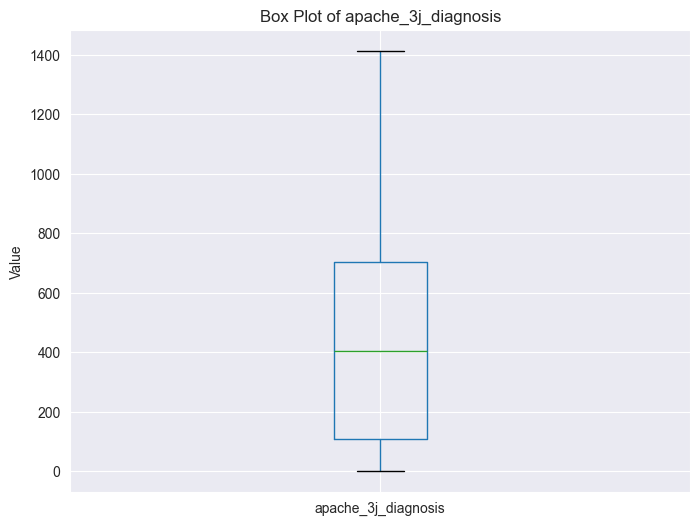

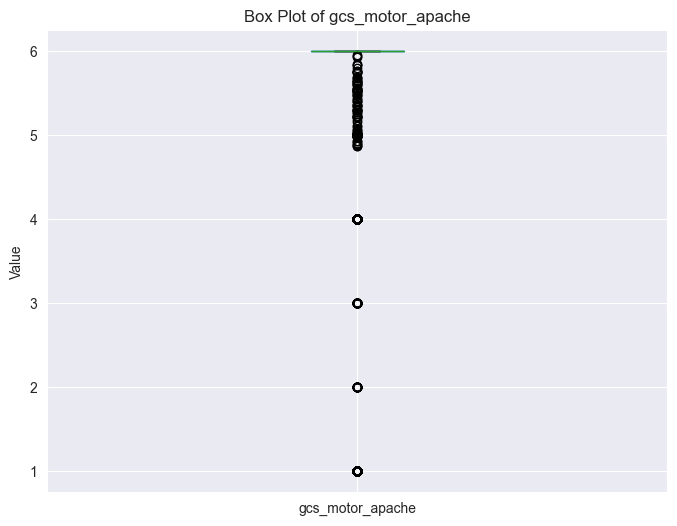

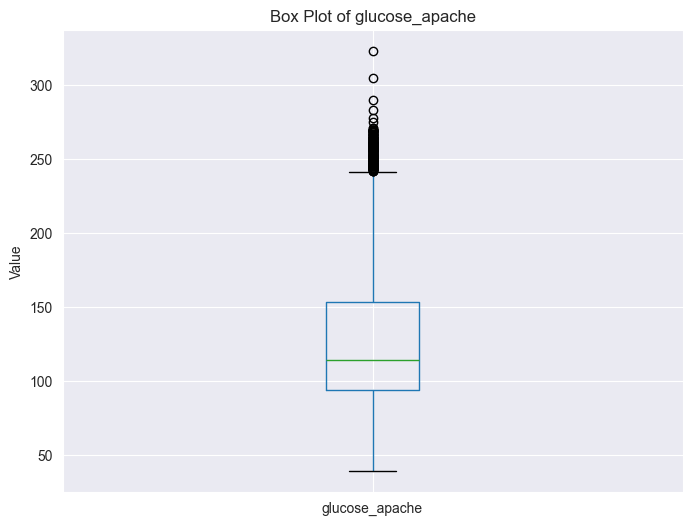

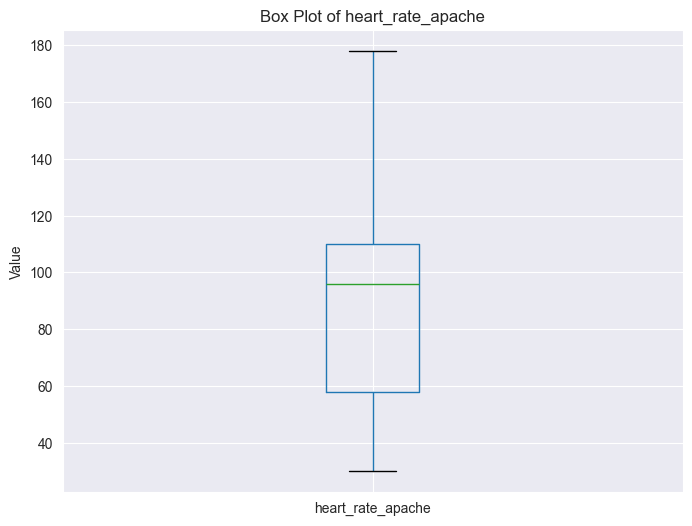

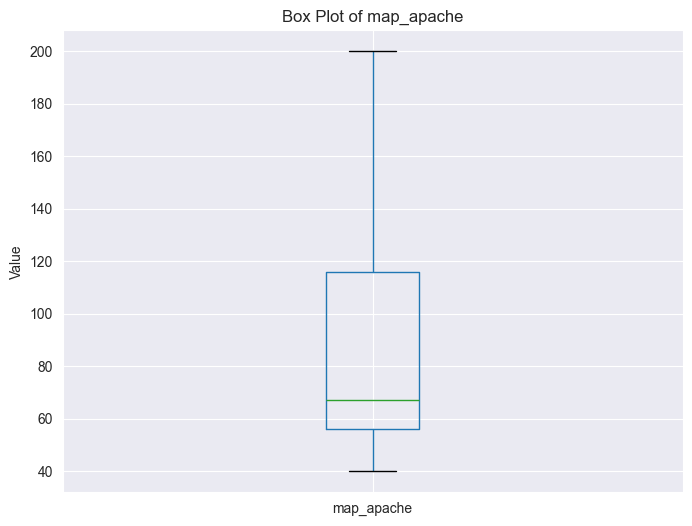

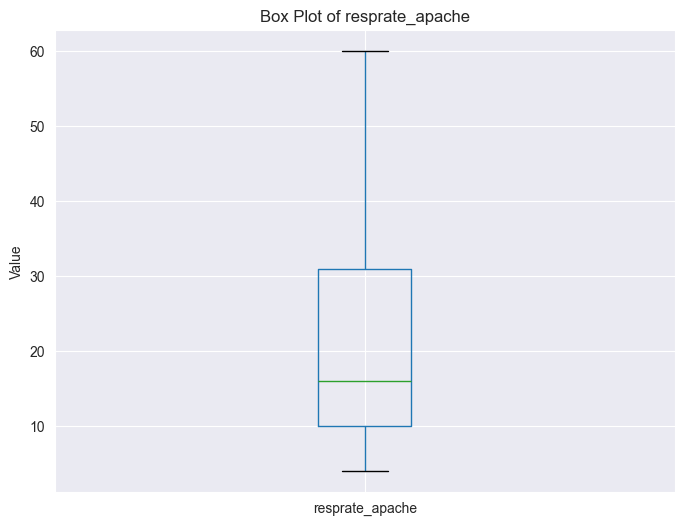

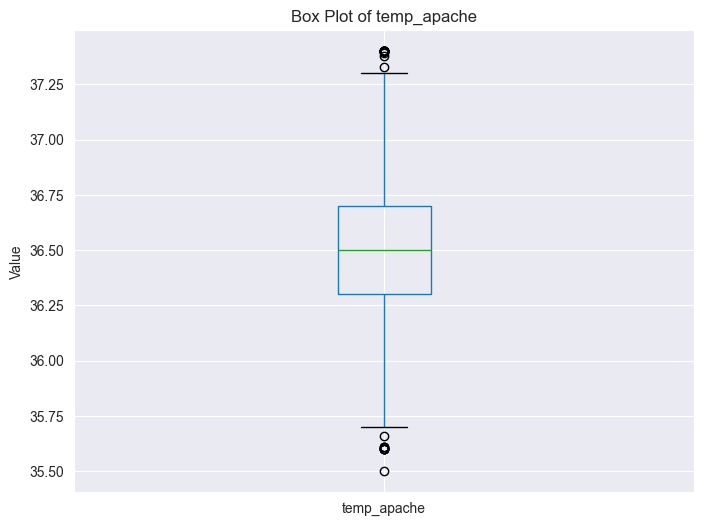

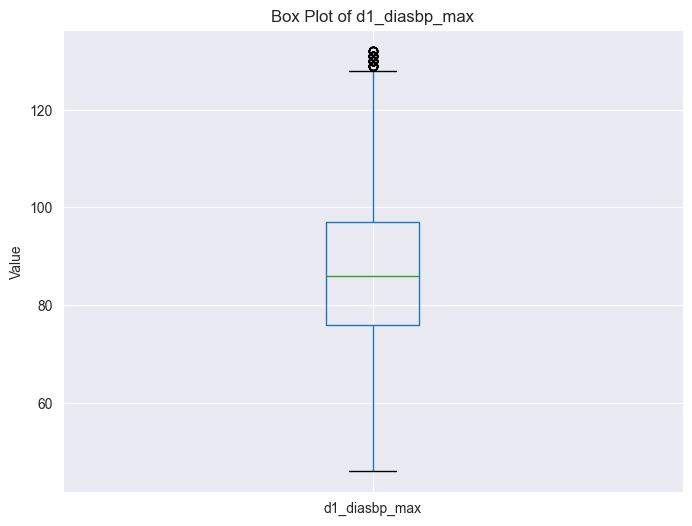

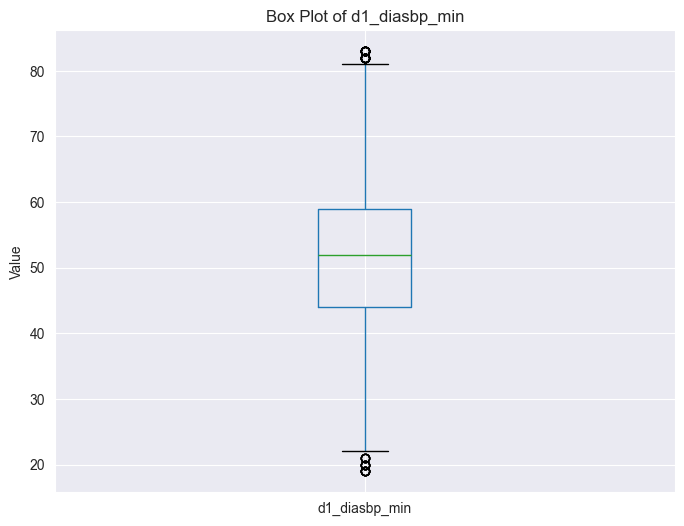

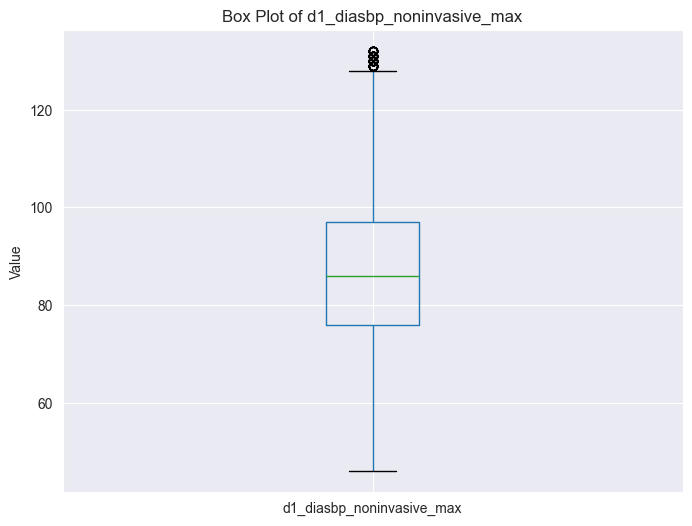

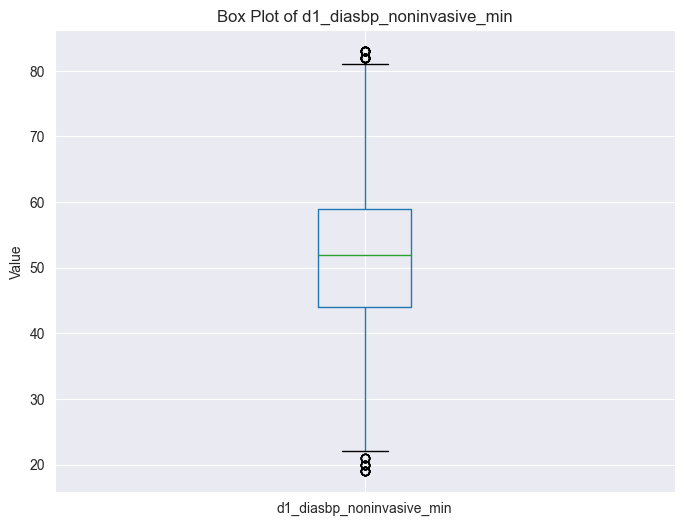

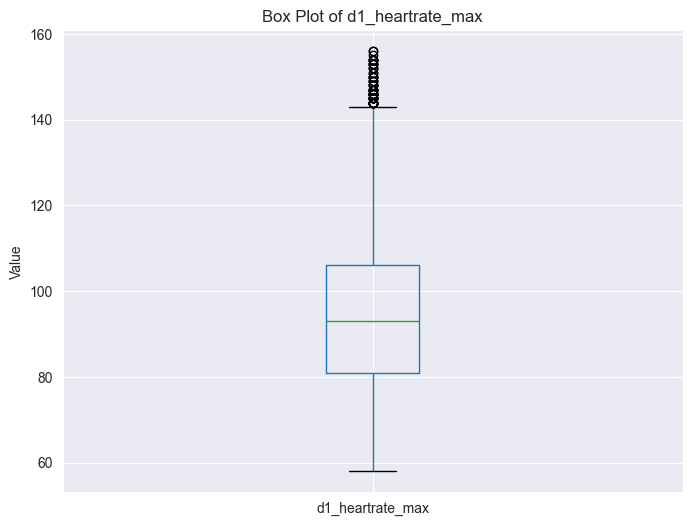

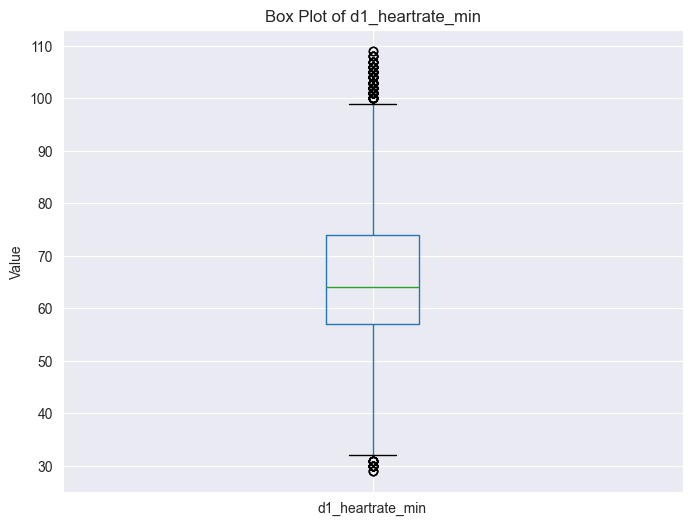

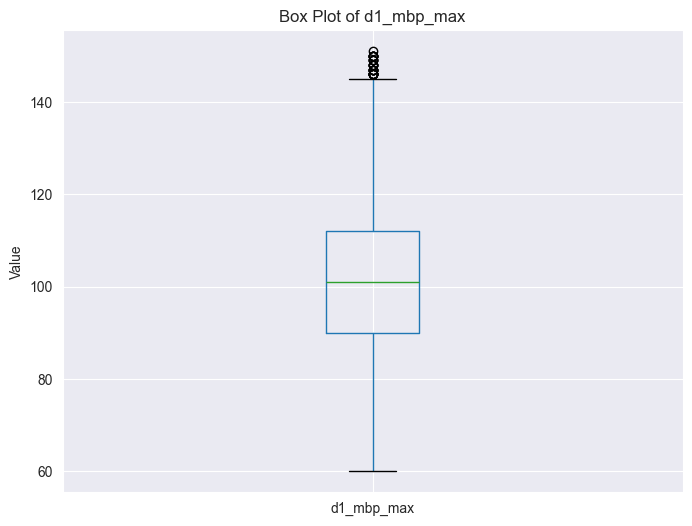

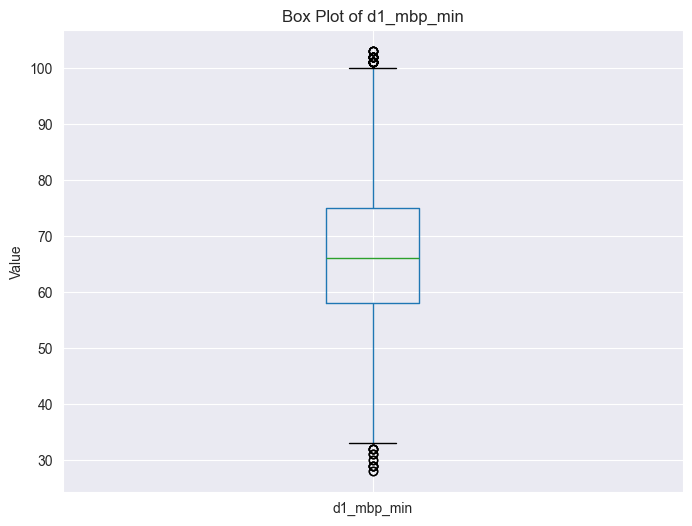

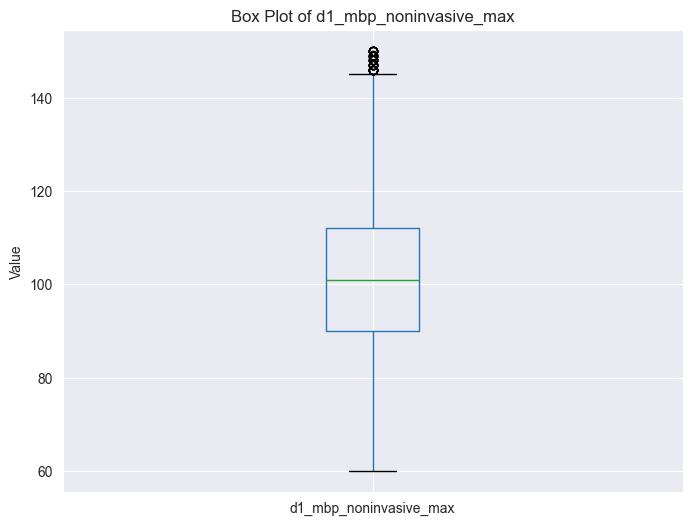

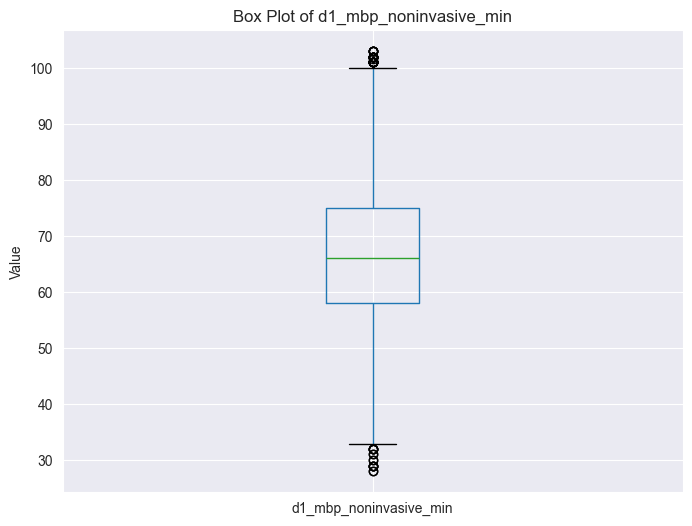

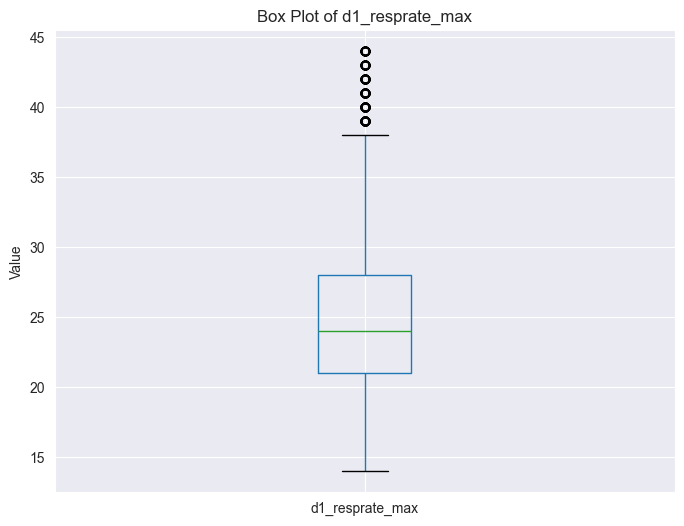

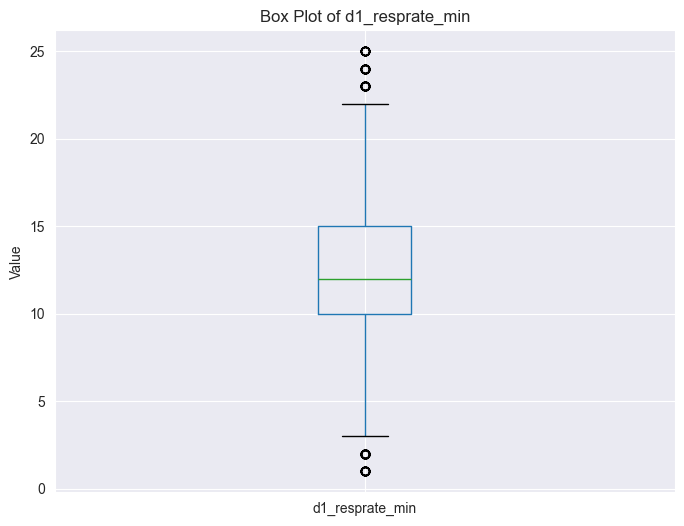

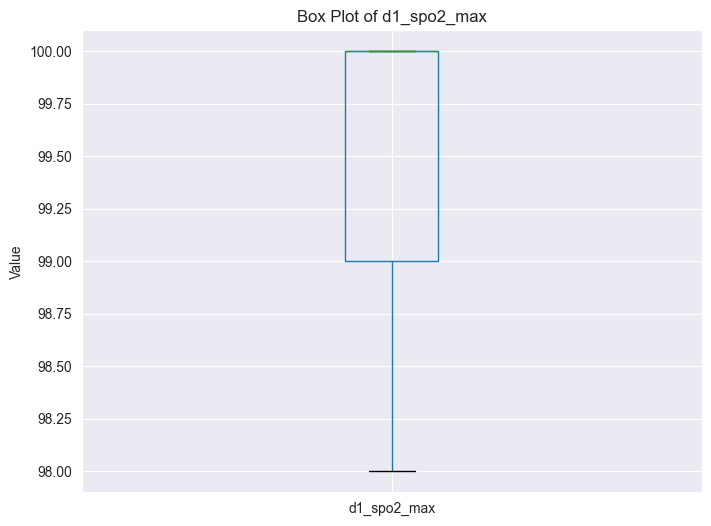

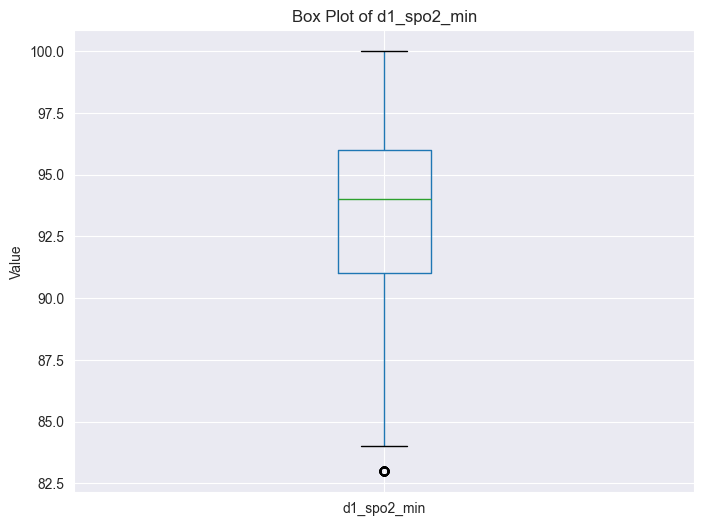

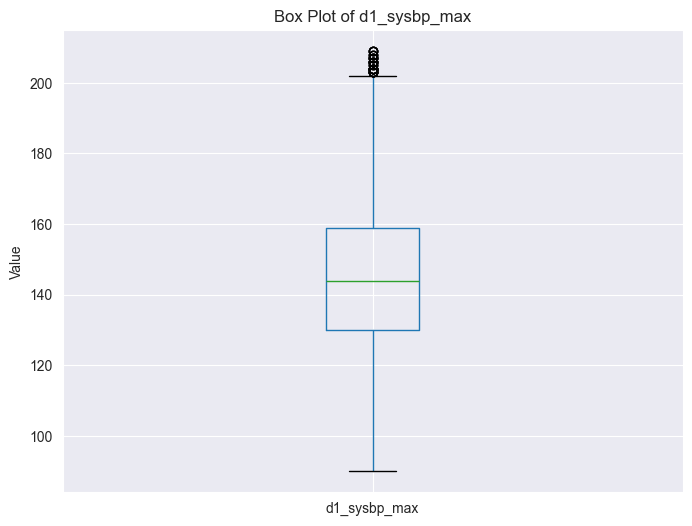

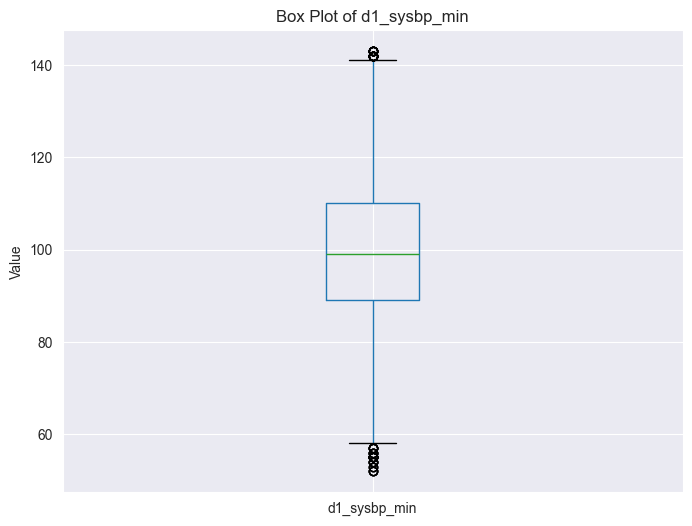

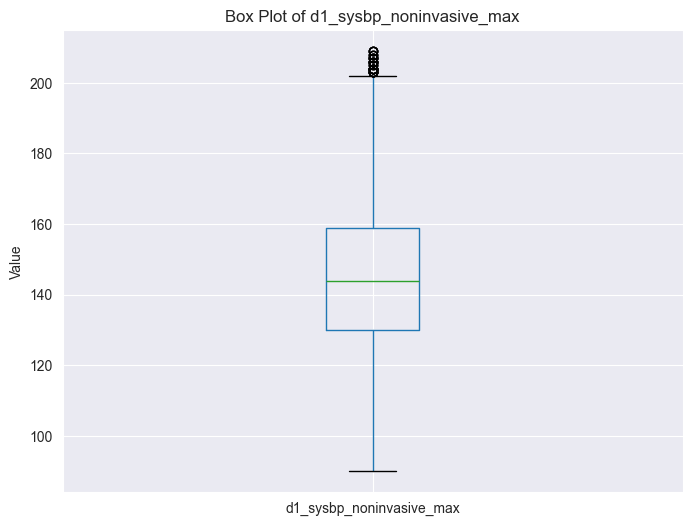

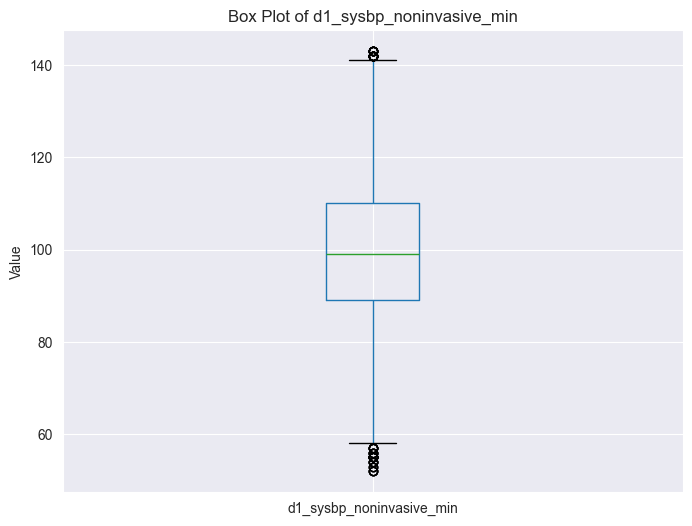

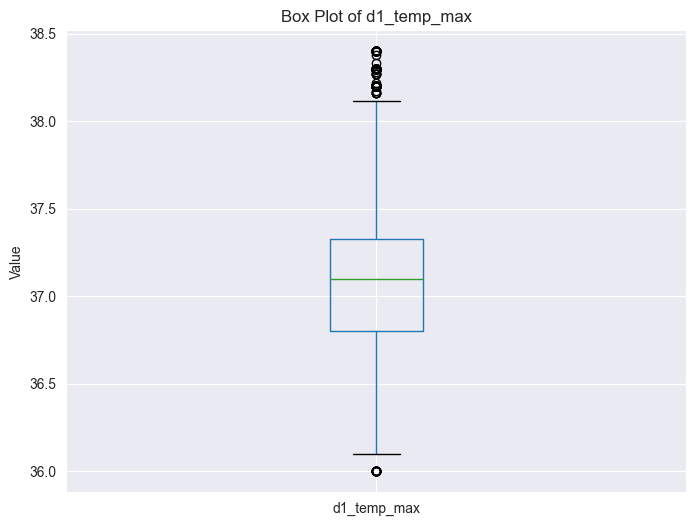

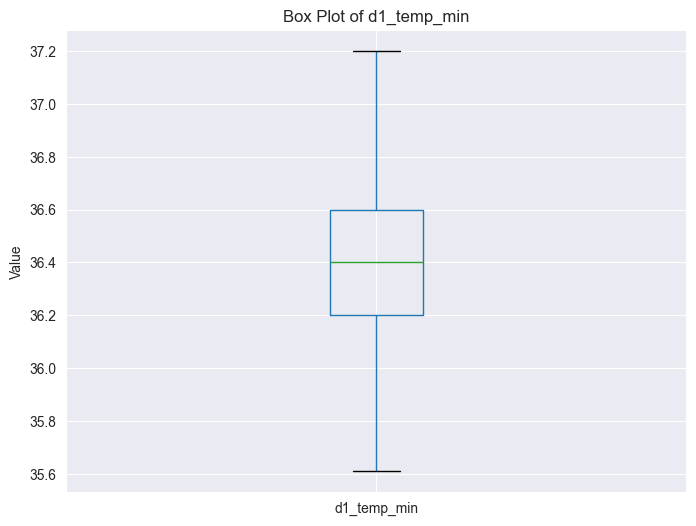

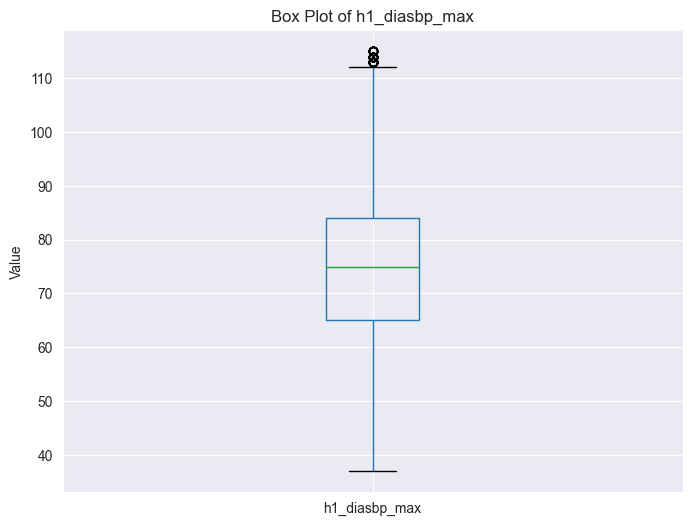

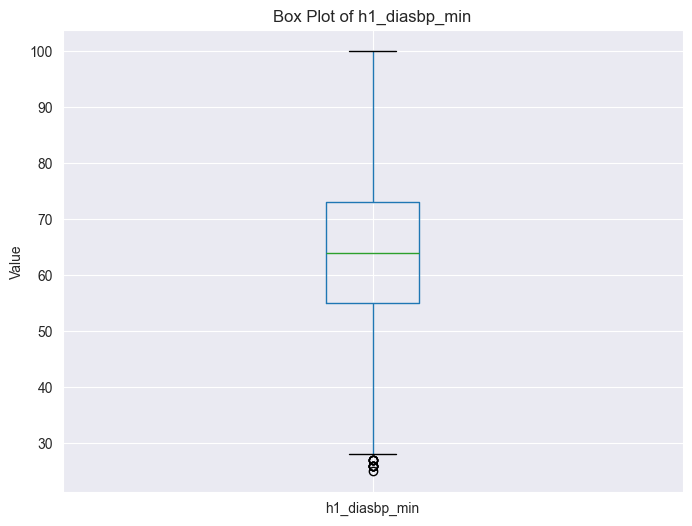

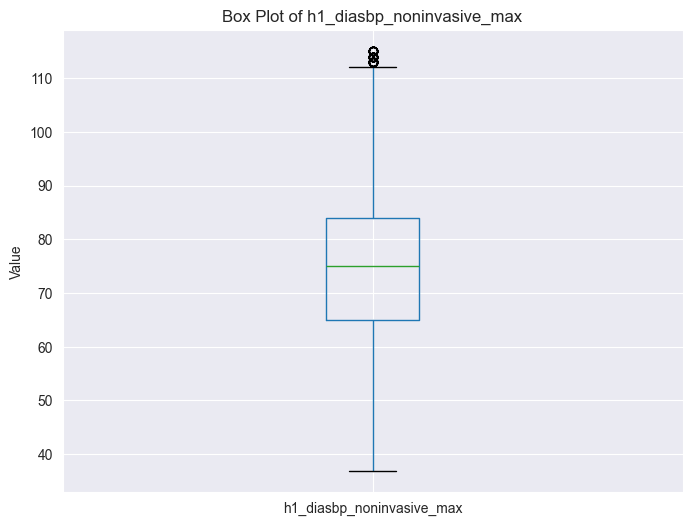

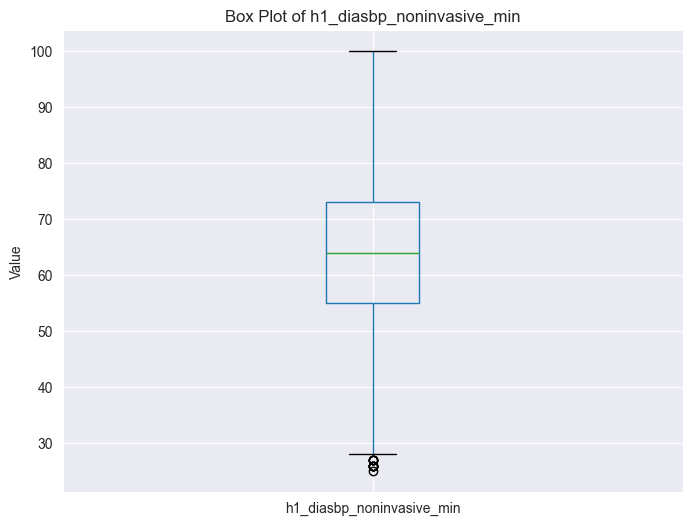

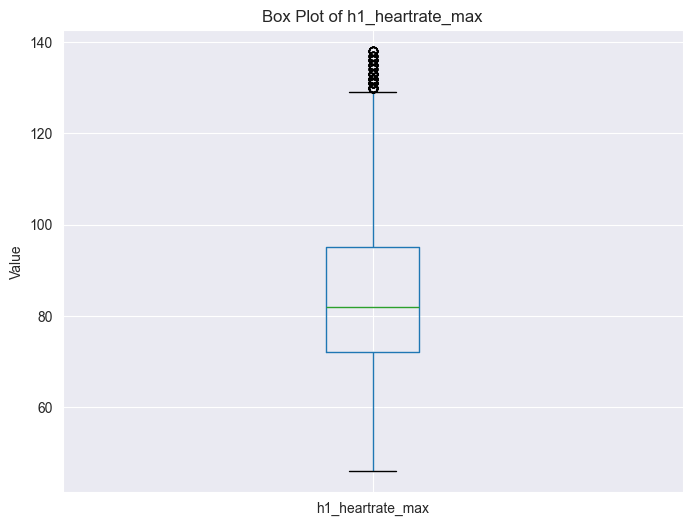

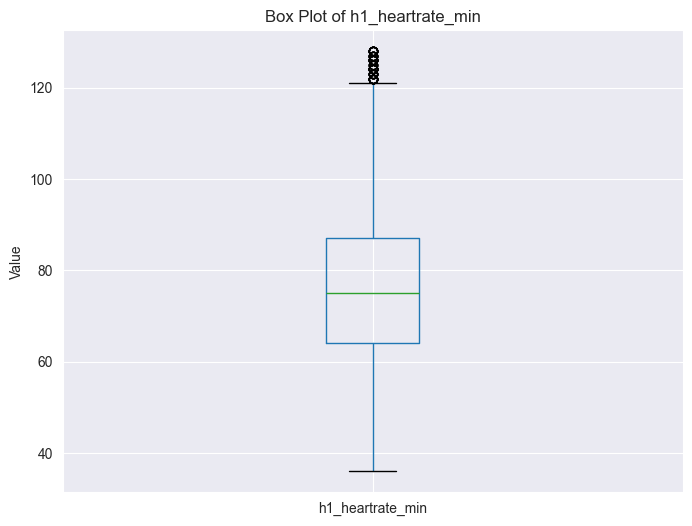

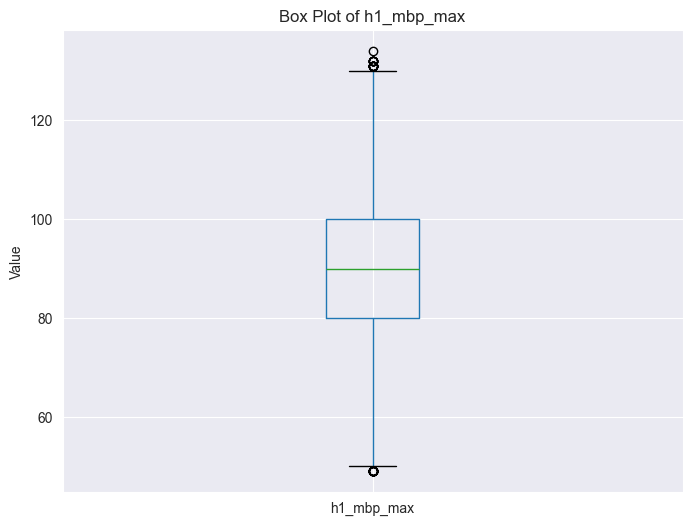

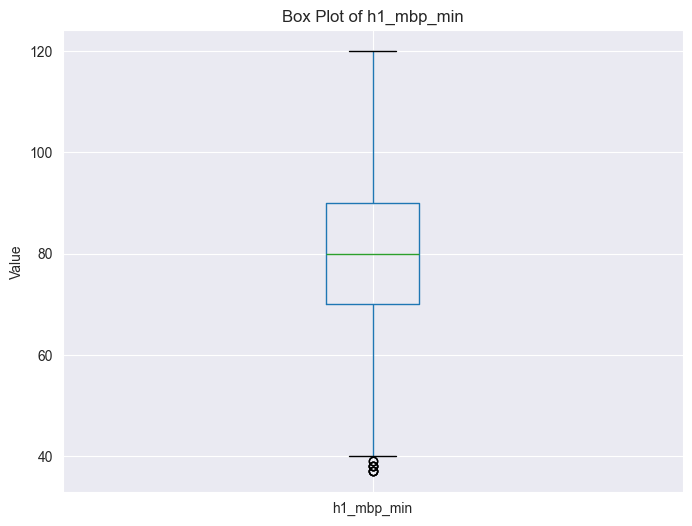

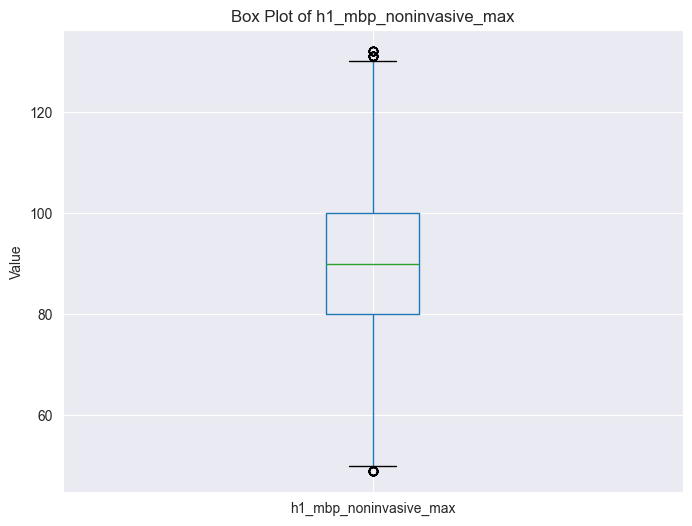

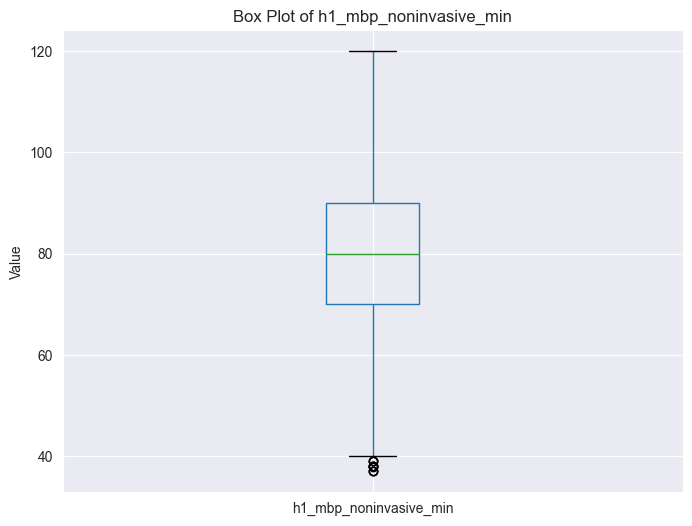

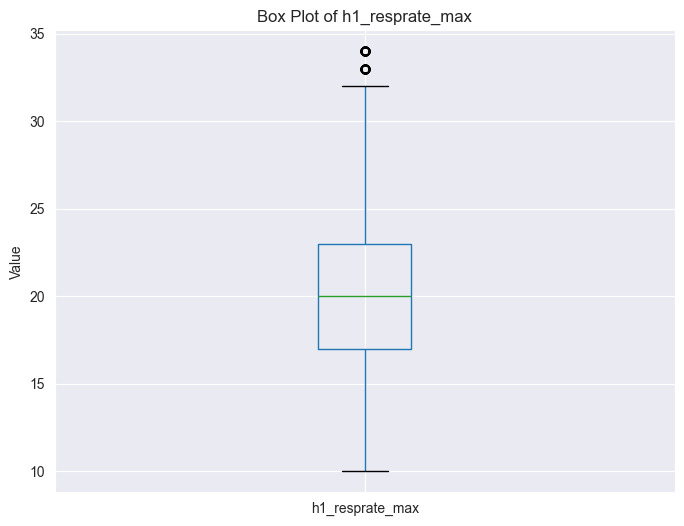

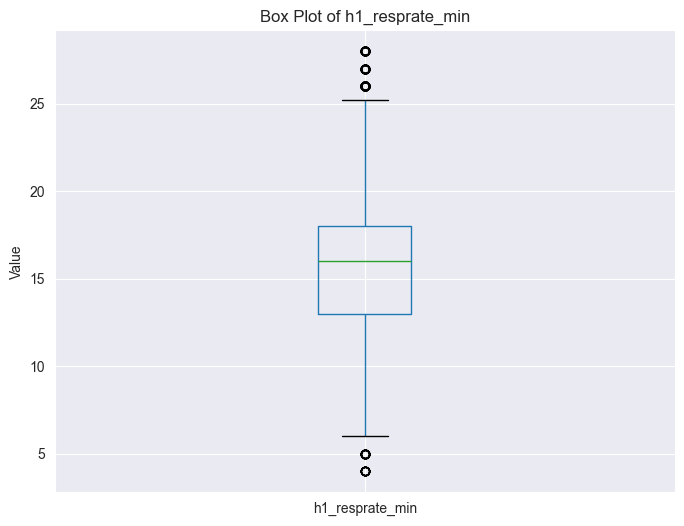

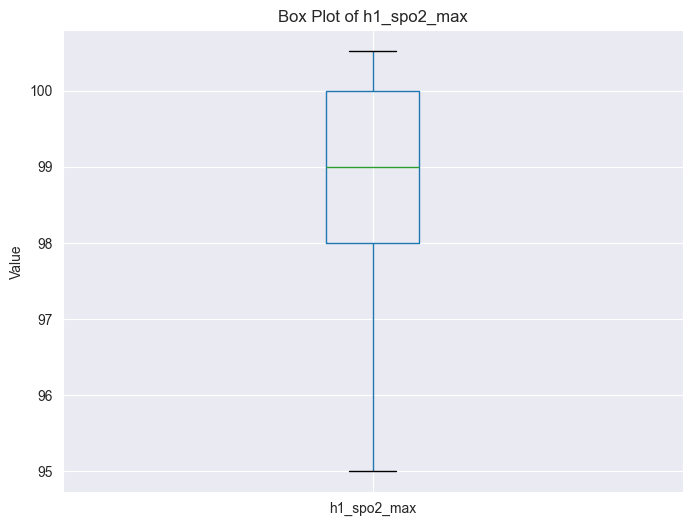

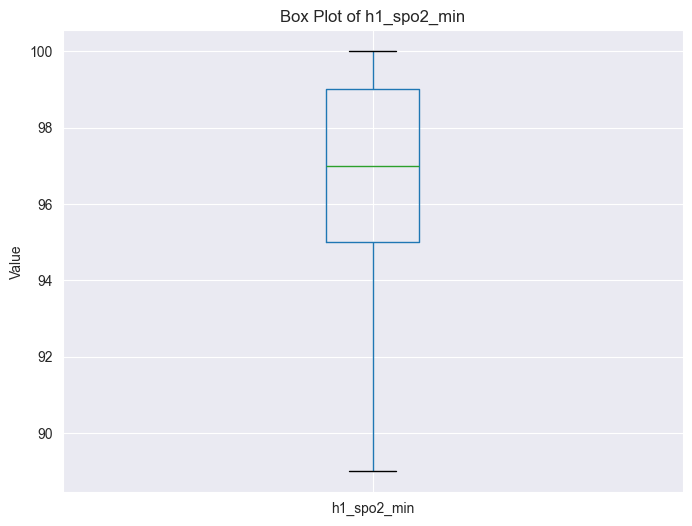

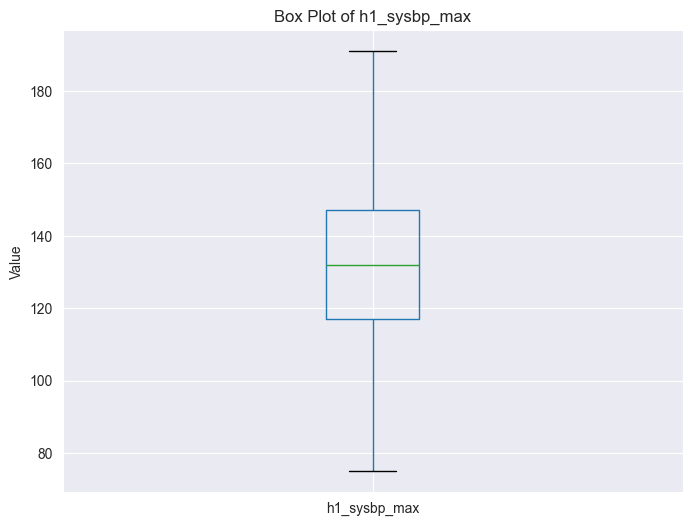

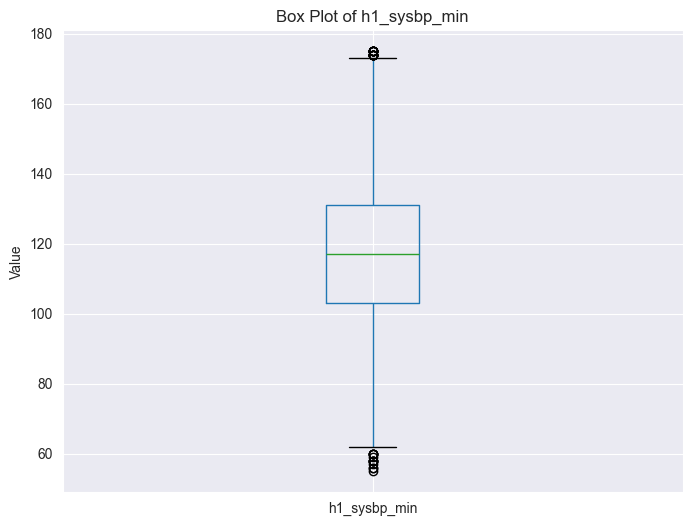

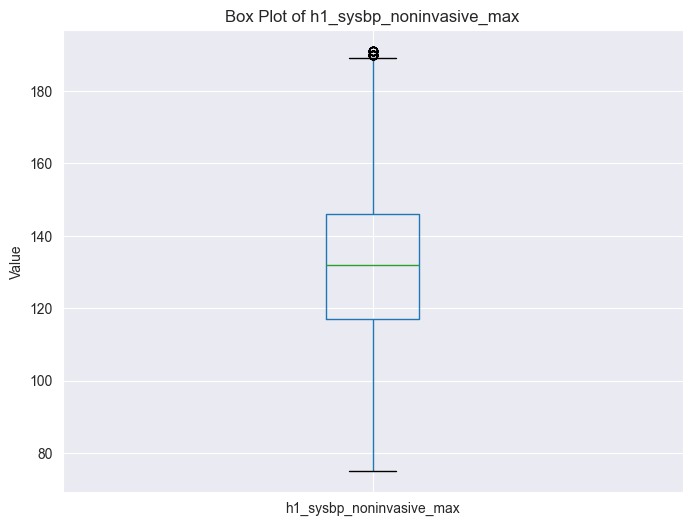

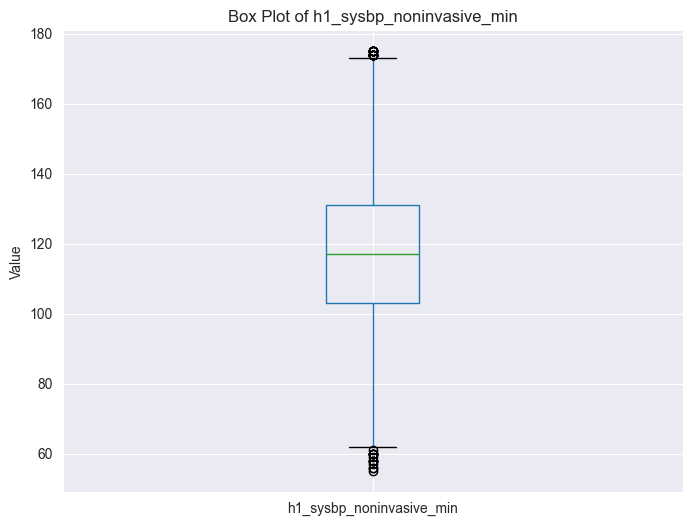

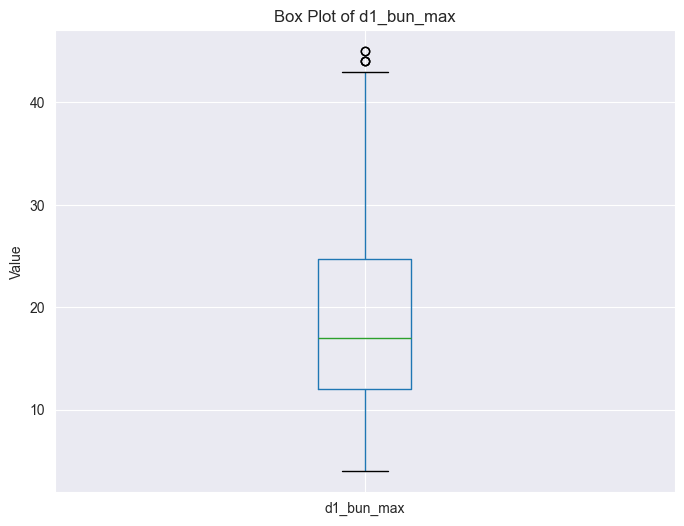

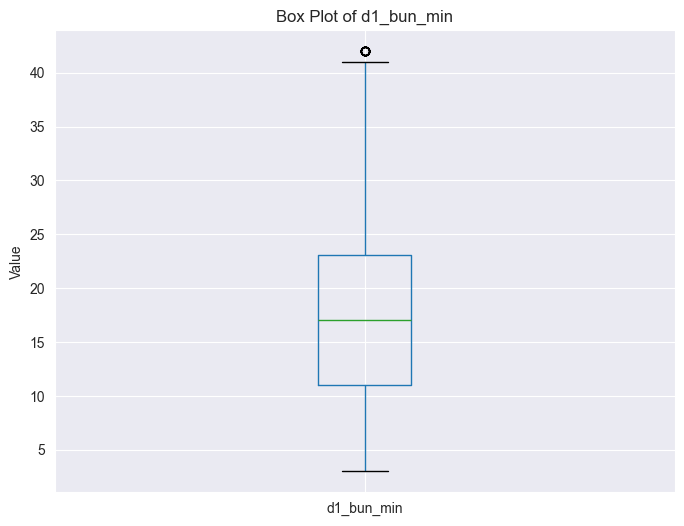

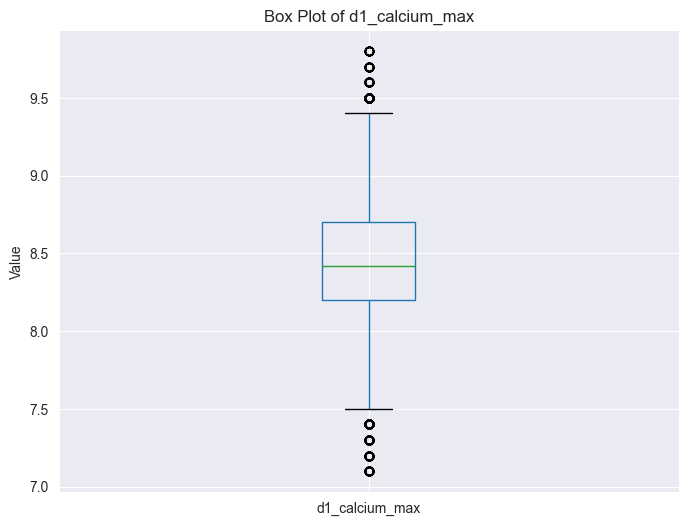

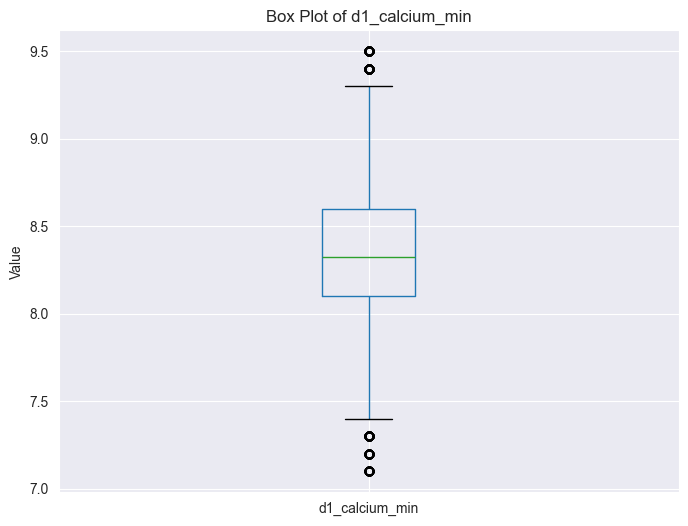

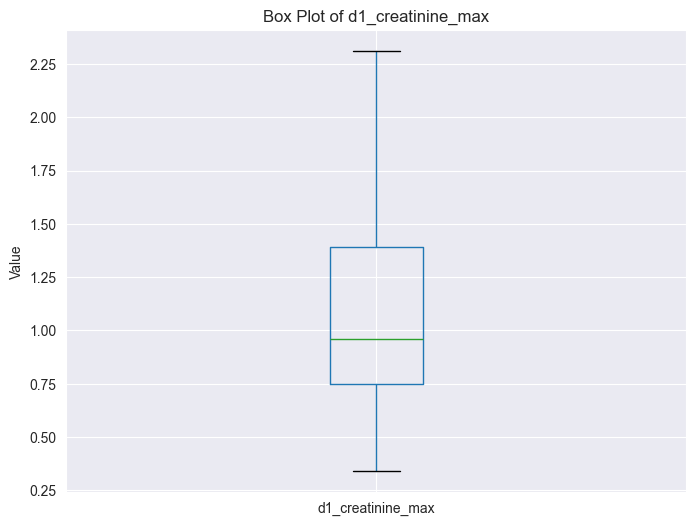

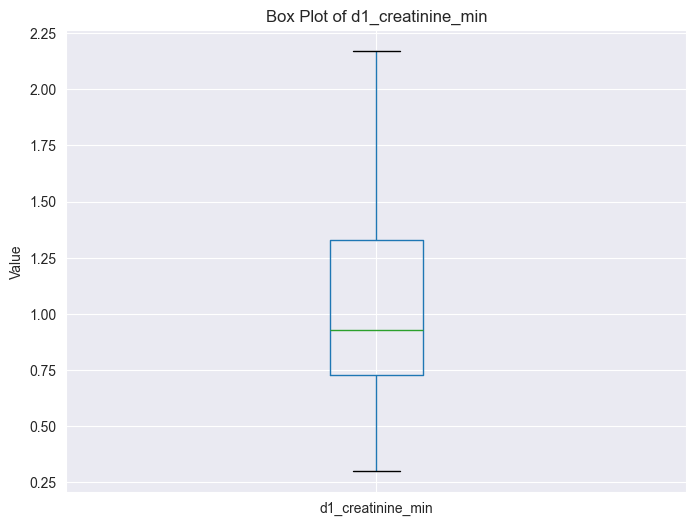

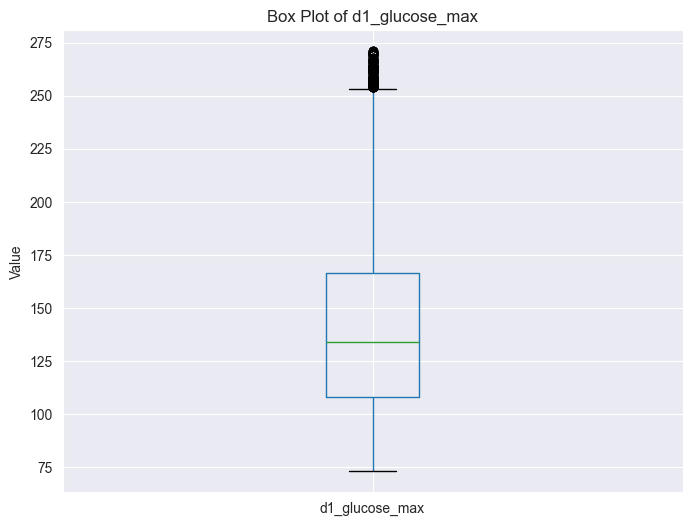

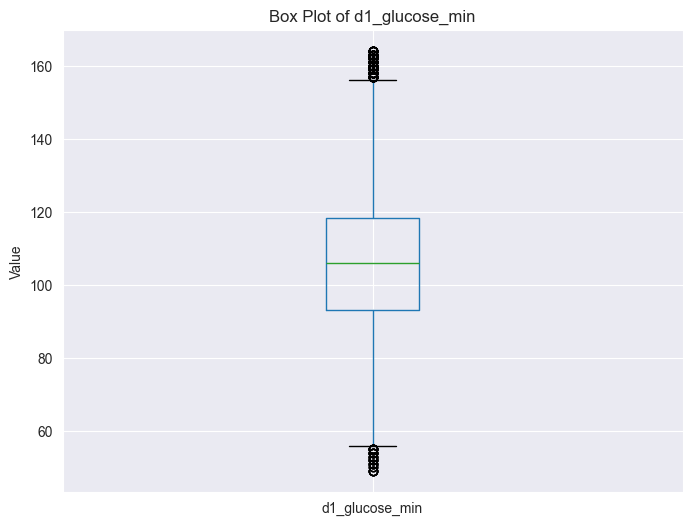

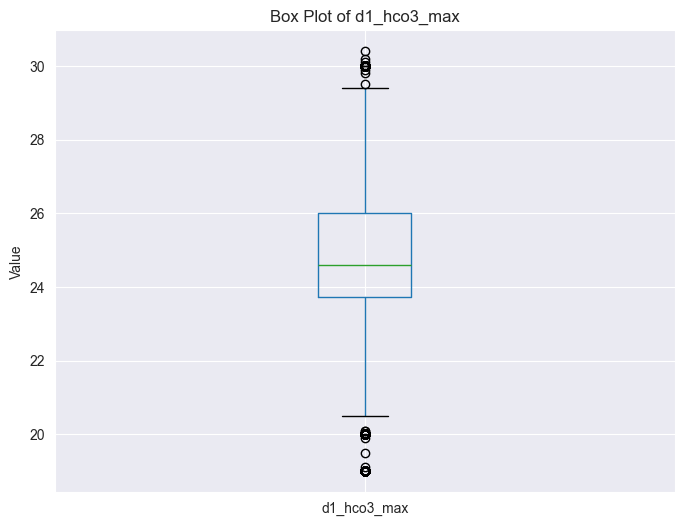

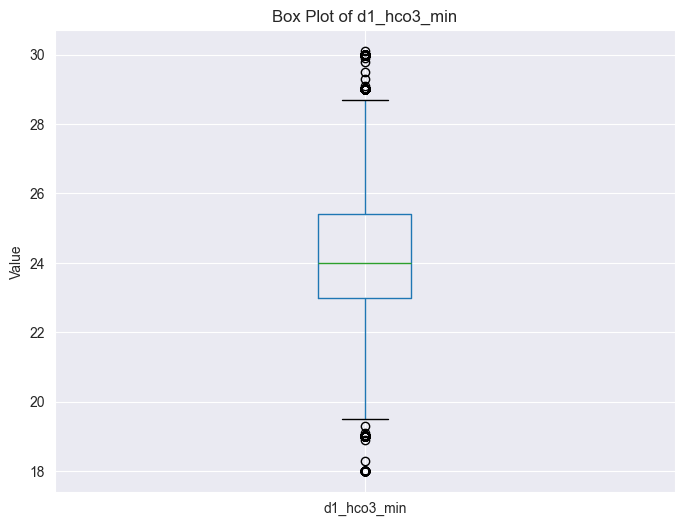

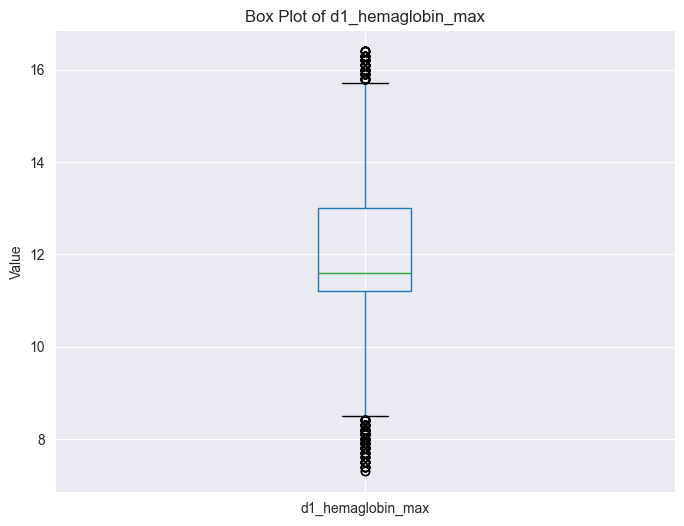

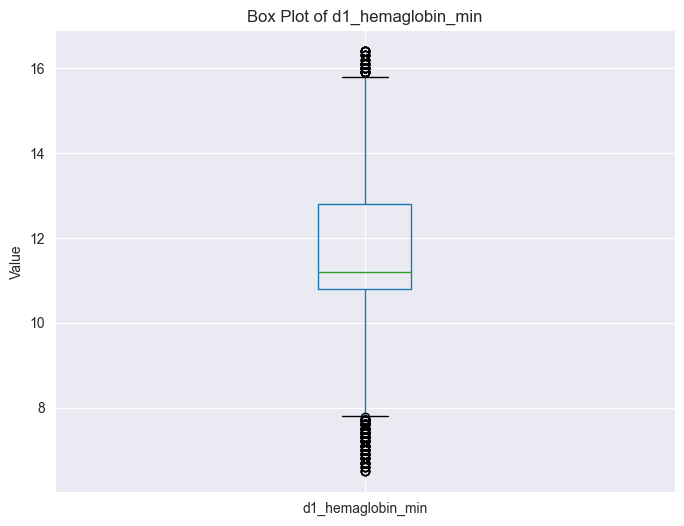

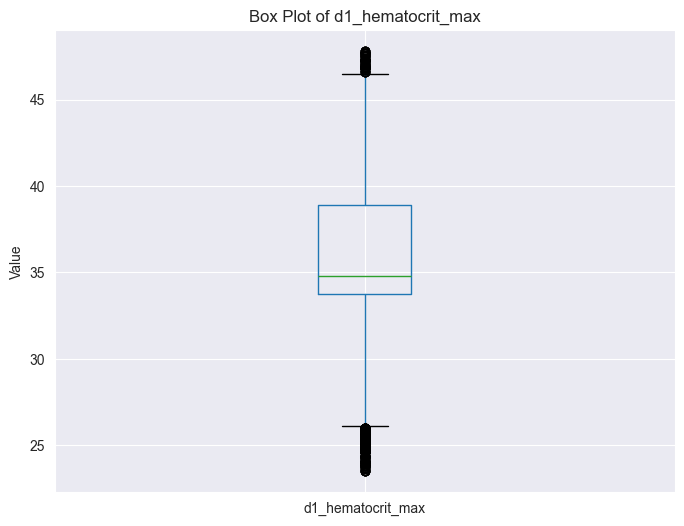

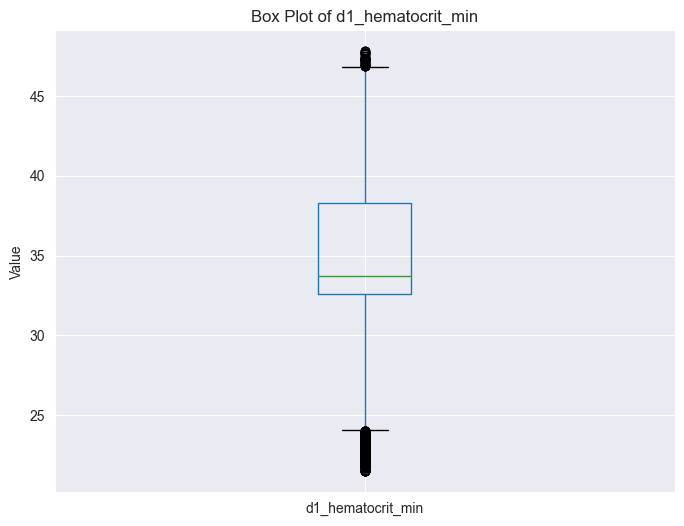

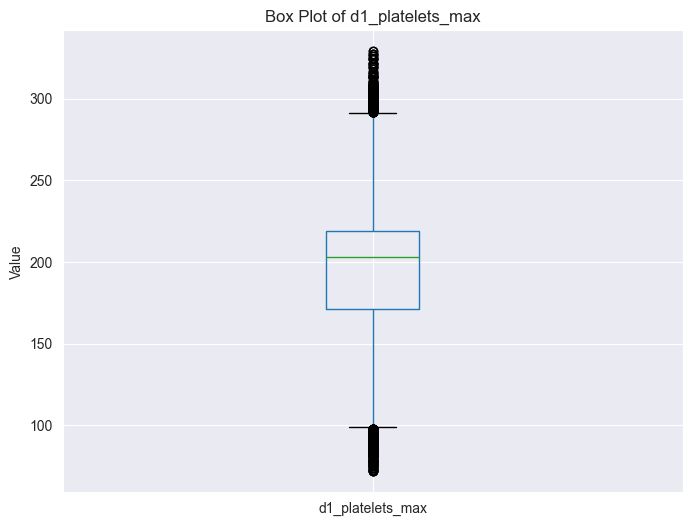

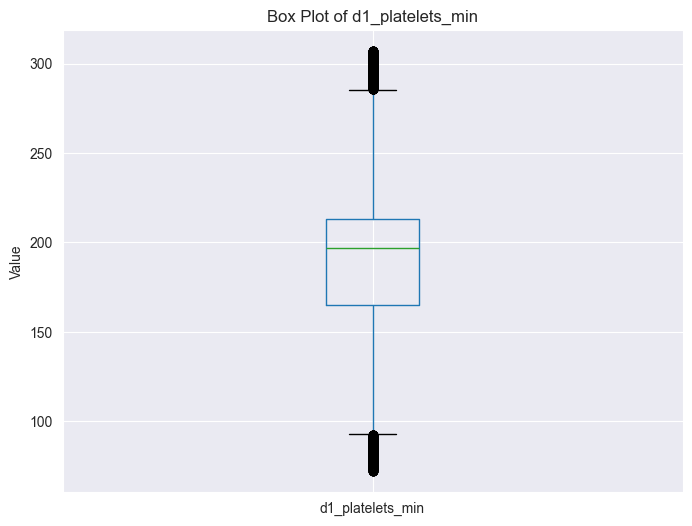

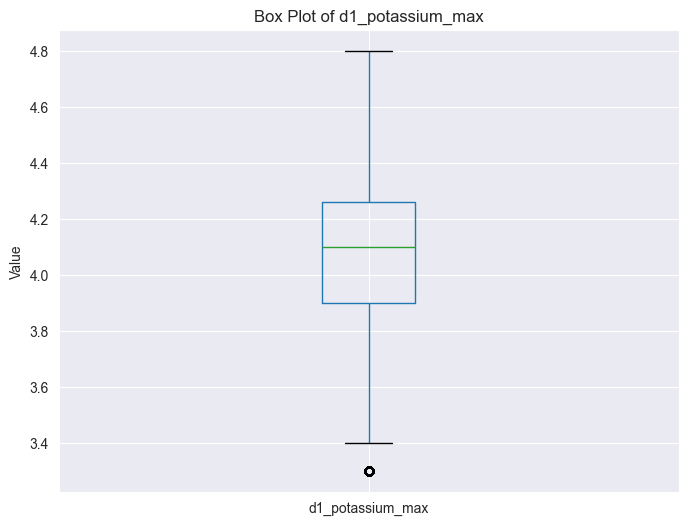

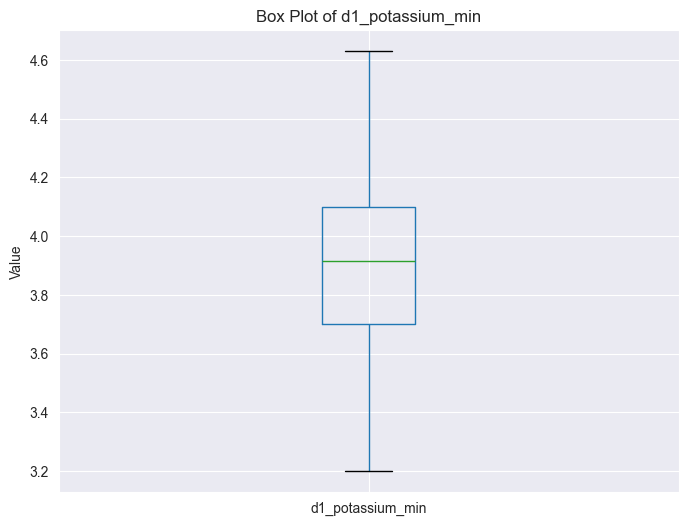

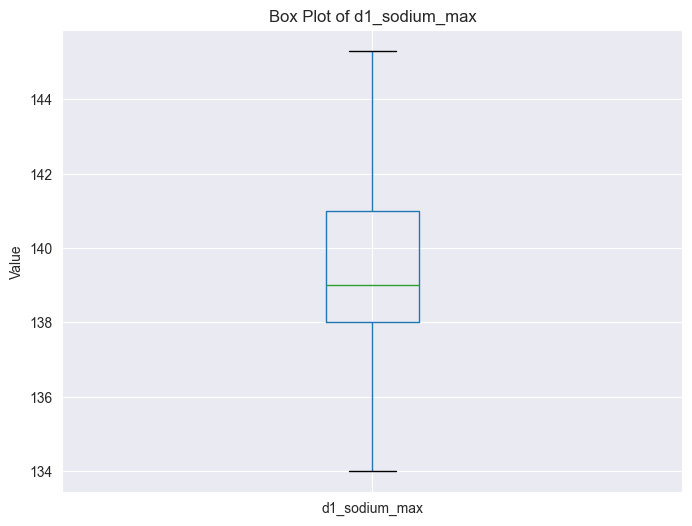

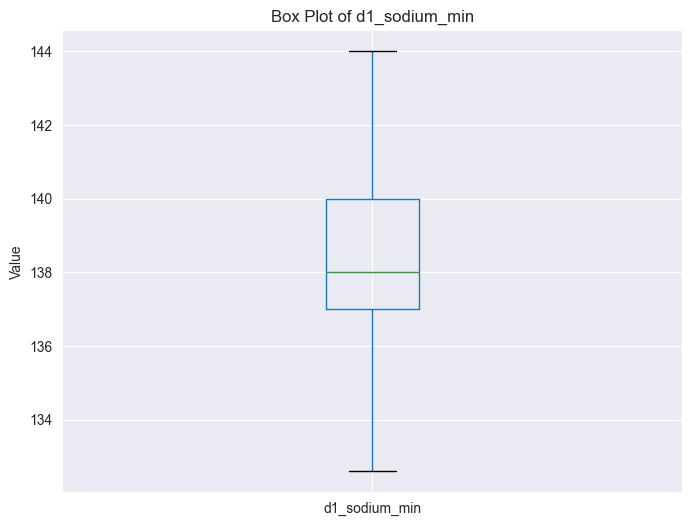

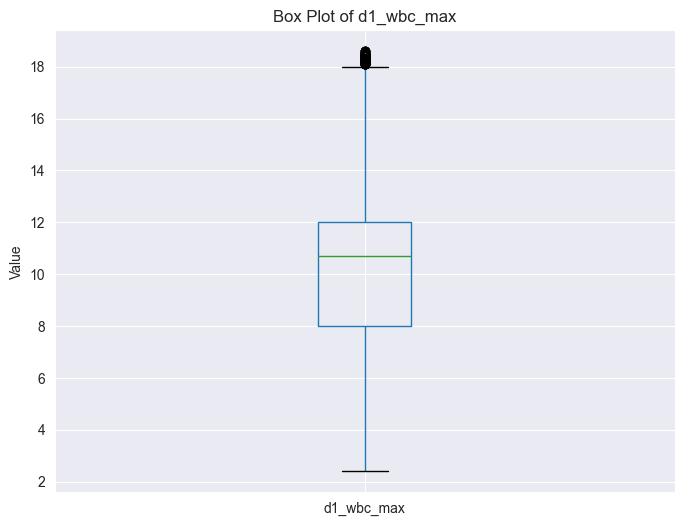

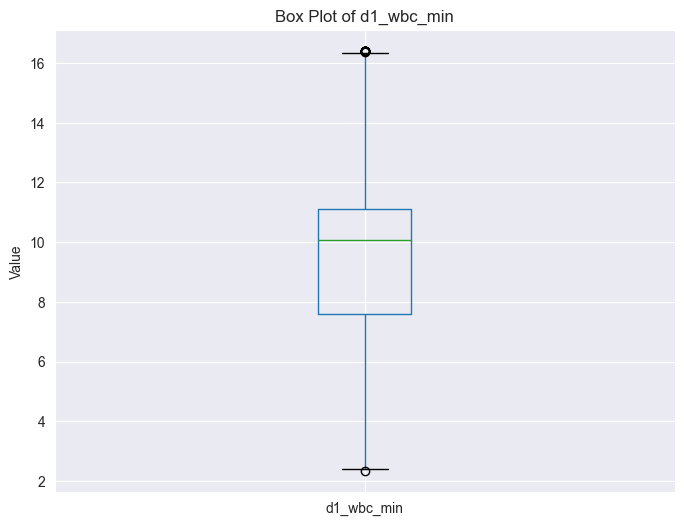

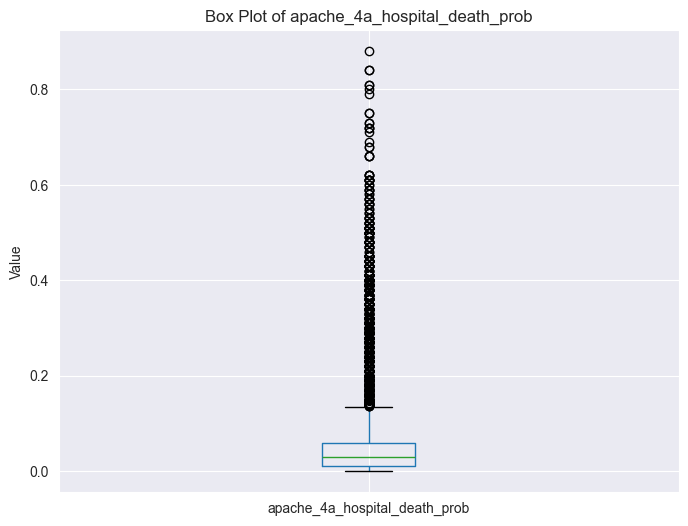

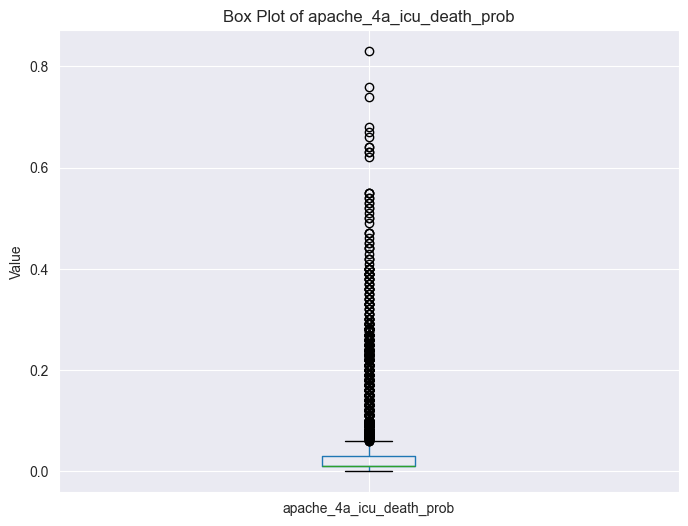

In [152]:
for column in filtered_columns_copy: # FilteredC-columns_copy doesnt include any categorical variables. 
    plt.figure(figsize=(8, 6))
    df_filtered_outliers.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()

# Converting df_filtered_outliers as CSV

In [164]:

id_columns = [col for col in df_filtered_outliers.columns if col.endswith('_id')]

other_columns = [col for col in df_filtered_outliers.columns if not col.endswith('_id')]

new_column_order = id_columns + other_columns

df_filtered_outliers = df_filtered_outliers[new_column_order]

df_filtered_outliers

,encounter_id,patient_id,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
2,119783,50777,118,93,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,...,205.933092,200.847180,4.190102,3.94134,138.996205,137.895792,11.672817,10.940954,0.00,0.00
9,42871,90749,118,114,Caucasian,M,Accident & Emergency,admit,CCU-CTICU,Cardiovascular,...,232.000000,232.000000,4.100000,3.30000,139.000000,139.000000,12.800000,12.800000,0.02,0.01
10,105427,125898,77,113,Hispanic,F,Operating Room / Recovery,admit,Med-Surg ICU,Respiratory,...,257.000000,257.000000,4.200000,4.20000,137.000000,137.000000,10.300000,10.300000,0.01,0.00
16,115771,71252,81,90,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,...,165.000000,141.000000,4.300000,4.10000,141.000000,140.000000,7.200000,5.700000,0.02,0.01
18,48056,114220,118,100,Hispanic,M,Accident & Emergency,admit,Neuro ICU,Neurological,...,217.000000,217.000000,4.000000,4.00000,137.844024,137.602093,5.000000,5.000000,0.03,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91660,74011,123550,195,908,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,...,264.000000,256.000000,4.100000,3.70000,139.000000,137.000000,9.980000,9.160000,0.04,0.02
91670,86506,120949,30,921,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Trauma,...,109.000000,101.000000,4.100000,3.90000,138.000000,137.000000,5.690000,5.290000,0.15,0.06
91687,76490,85324,195,908,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,...,204.952301,198.368713,4.000000,4.00000,139.000000,139.000000,10.635992,9.892924,0.11,0.04
91706,127138,59223,121,925,Native American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,...,211.000000,198.000000,4.200000,4.10000,140.000000,139.000000,7.470000,7.140000,0.01,0.00


In [165]:
df_filtered_outliers.to_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/01_Visualization of Complex Data/05_Projects/Patient-Survival-Prediction---Dash-Visualization/dataset/Original.csv', index=False)